<a href="https://colab.research.google.com/github/Virtud87/MIT-capstone-project/blob/main/Capstone_Project_Notebook_Full_Code_Used_Cars_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

 - **For both sellers and buyers, setting and identifying the correct price is essential. Sellers want to get a fair price for their vehicles, while buyers want a great deal. Accurate pricing can attract potential customers, aid in efficient sales, and bolster the company's foothold in this growing market.**

### **The objective:**

 - What is the intended goal?

 - **To create a predictive model that will aid the business in predicting the price of a used car in order to gain a competitive edge in the market, and thus, grow the business.**

### **The key questions:**

- What are the key questions that need to be answered?

- **Which factors significantly influence the pricing of used cars?**

- **Which attributes of a car (mileage, brand, model, year, etc.) have the most impact on its price?**

- **How accurately can we predict the price of a used car based on its attributes?**

### **The problem formulation**:

- What is it that we are trying to solve using data science?

- **The primary goal is to develop a pricing model for used cars that accurately predicts their prices based on various attributes.**

- **Another goal is to identify and analyze the factors that play a crucial role in determining the price of a used car.**

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Loading libraries**

In [ ]:
# data manipulation
import pandas as pd

import numpy as np

# data visualization
import seaborn as sns

import matplotlib.pyplot as plt

# testing normality
from scipy.stats import shapiro

# linear regression models
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

import statsmodels.api as sm

# non-linear models
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

# splitting train/test data
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# scaling the data
from sklearn.preprocessing import MinMaxScaler

# check model performance
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

# For tuning the model
from sklearn.model_selection import GridSearchCV

# check which independent variables are inflated
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### **Let us load the data**

In [ ]:
df = pd.read_csv('/content/used_cars.csv')
df_copy = df.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# check first 5 rows
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [ ]:
# check last 5 rows
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


In [ ]:
# check the number of rows and columns
df.shape

(7253, 14)

- There are **7,253 rows** and **14 columns**.

In [ ]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


- **'Name'**, **'Location'**, **'Fuel_Type'**, **'Transmission'**, and **'Owner_Type'** are all strings while the **rest are numerical**.

In [ ]:
# check for missing values
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

- **'Mileage'**, **'Engine'**, **'Power'**, **'Seats'**, **'New_Price'**, and **'Price'** all have **missing values** which will have to be imputed.

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### **Descriptive and Summary Analysis**

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [ ]:
# checking for duplicates
df.duplicated().sum()

0

- There are **no duplicates**.

In [ ]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


 - **'Year'** ranges from 1996 to 2019 with the average year being around 2013

 - **'Kilometers_Driven'** ranges from as few as 171 Km to as much as 6.5 million Km. The average is 58,699 Km with a very large standard deviation of 84,427. This may be due to the really low and really high outliers.

 - **'Mileage'** has a range from zero to 33.54 Km/L but having zero as mileage makes no sense. So we must assume mileage listed as zero is like a null value.

 - **'Engine'** has a displacement value range from 72 cc to 5,998 cc with the average being 1,616 cc and a relatively high standard deviation.

 - **'Power'** ranges from 34.2 BHP to 616 BHP with an average of 112 BHP and a relatively moderate standard deviation. Most vehicles are below 138 BHP hence they are probably family vehicles with 4 doors and not sports cars.

 - **'Seats'** range from 2 to 10 meaning there could be sports cars with just 2 seats to buses/vans with up to 10 seats. Most however appear to have 5 seats max.

 - **'New_Price'** ranges from 391,000 rupees to 37.5 million rupees with the average around 2.28 million rupees with a standard deviation of almost 2.8 million rupees. The majority of the vehicles brand-new cost no more than 2.6 million rupees.

 - **'Price'** ranges from 44,000 rupees to 16 million rupees with an average of 1.1 million rupees. The majority of used vehicles are under 995,000 rupees.

In [ ]:
# checking for unique values
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64

- all columns have multiple unique values with **'Transmission'** having the least at just two while **'S.No.'** has the most at 7,253. 'S.No.' having the most unique values, which match the amount of records, makes sense because cars should have unique serial numbers. This column will ulimately be dropped.

- **'Location'**, **'Year'**, **'Fuel_Type'**, **'Transmission'**, **'Owner_Type'**, and **'Seats'** all have the lowest amounts of unique values.

- The data comes from just **11 locations**.

- All but one year from the 1996-2019 vehicle manufactured year range is represented at least once.

- There are **2041** unique car models.

- Since **'Name'** includes both the make and model, the amounts of unique values for the make is probably lower as a make can have multiple models.

In [ ]:
# checking which models are currently the most abundant avaiable for purchase
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

- The **top five vehicle types** are mostly 4-door small-to-medium-sized compact cars with the most abundant(Mahindra XUV500 W8 2WD) being a crossover-type SUV.

In [ ]:
# checking which are the 11 unique locations
cities = df['Location'].unique()
for city in cities:
  print(city)

Mumbai
Pune
Chennai
Coimbatore
Hyderabad
Jaipur
Kochi
Kolkata
Delhi
Bangalore
Ahmedabad


- plotting all eleven cities to get an idea of which parts of the country are being represented

In [ ]:
''' folium allows us to generate map images to visualize where the cities are
relative to each other and the rest of the country '''

import folium

# latitude and longitude coordinates of the cities
cities = {
    'Mumbai': (19.0760, 72.8777),
    'Pune': (18.5204, 73.8567),
    'Chennai': (13.0827, 80.2707),
    'Coimbatore': (11.0168, 76.9558),
    'Hyderabad': (17.3850, 78.4867),
    'Jaipur': (26.9124, 75.7873),
    'Kochi': (9.9312, 76.2673),
    'Kolkata': (22.5726, 88.3639),
    'Delhi': (28.7041, 77.1025),
    'Bangalore': (12.9716, 77.5946),
    'Ahmedabad': (23.0225, 72.5714)
}

# create a map of India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5, zoom_control=False)

# add markers for each city
for city, coordinates in cities.items():
    folium.Marker(location=coordinates, popup=city).add_to(india_map)

india_map.options.update({
    'scrollWheelZoom': False,  # disable zoom using the mouse scroll wheel
    'dragging': False          # disable panning/dragging the map
})

# display the map
india_map

- The majority of the cities are located in the South, West, and Northwest of the country with Kolkata being the only city from the East.

- Citites from the country's center and far Northeast are not being represented

- Upon further research, all the cities are among the most populous cities in the country except for Coimbatore, Tamil Nadu and Kochi, Kerala.

- Interesting that cities of relatively lower populations are included amongst the most populous. It makes sense, however, that most of the cities being used are the most populous.

In [ ]:
# checking the 5 fuel types
fuel_types = df['Fuel_Type'].unique()
for fuel in fuel_types:
  print(fuel)

CNG
Diesel
Petrol
LPG
Electric


- The 5 fuel types are Petrol, Diesel, Electric, Compressed Natural Gas(CNG), and Liquified Petroleum Gas(LPG)

In [ ]:
# checking which are the 4 owner types
owner_type = df['Owner_Type'].unique()
for owner in owner_type:
  print(owner)

First
Second
Fourth & Above
Third


- The 4 owner types are: first, second, third, fourth & above

In [ ]:
# drop serial number column as that is just an arbitrary identifier and thus bears no influence on the used car's price
df.drop('S.No.', axis = 1, inplace=True)

### **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables.
2. Check the distribution of the different variables. Are the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perform the log_transformation(if needed) and write down your observations.

#### **Numerical Variable Analysis**

In [ ]:
# function to create 2 subplots: boxplot and histogram
def boxplot_histogram(dataframe, feature, figsize = (10, 8)):

  univari_fig, (box, histo) = plt.subplots(nrows=2, sharex=True, figsize = figsize) # create subplots

  sns.boxplot(data = dataframe, x = feature, ax = box) # create boxplot

  sns.histplot(data = dataframe, x = feature, ax = histo) # create histogram

**Year**

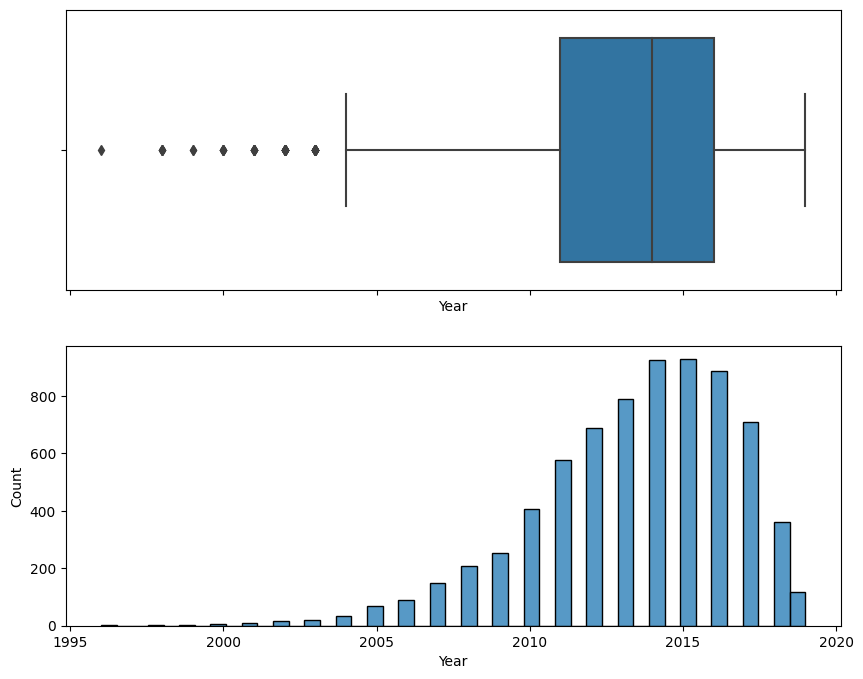

In [ ]:
boxplot_histogram(df, 'Year')

- The year of manufacturing is very skewed to the left. All the outliers are older than 2004.

- The majority of the vehicles are from 2010 to 2017 with those from years 2014 and 2015 being the most numerous.

- It may be that 'Year' should be converted to a categorical variable instead of leaving it as a numerical variable

**Kilometers_Driven**

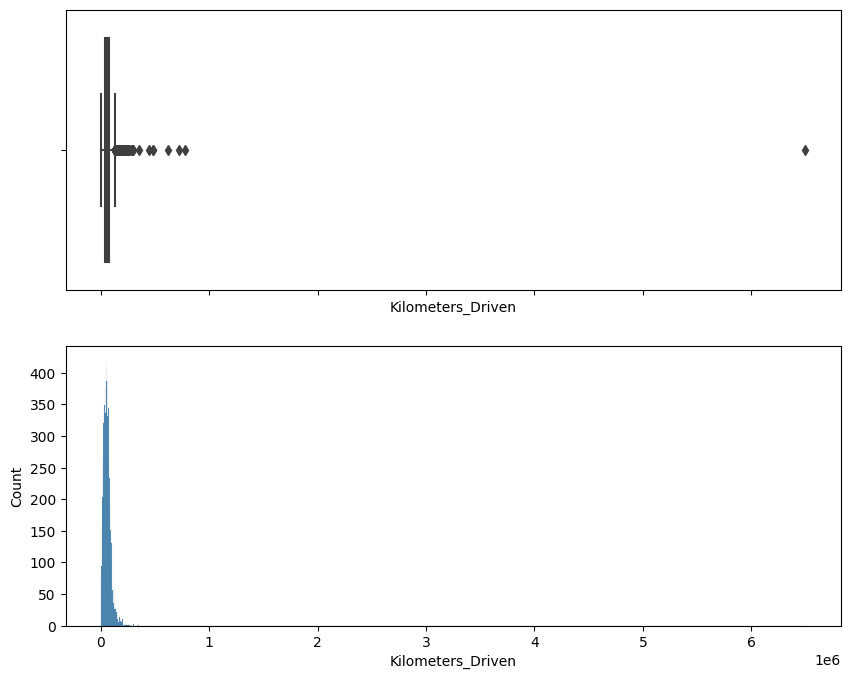

In [ ]:
boxplot_histogram(df, 'Kilometers_Driven')

- Kilometers driven are extremely skewed to the right with one extreme(the one at 6.5 million Km)

- We can check the distribution after removing that extreme outlier

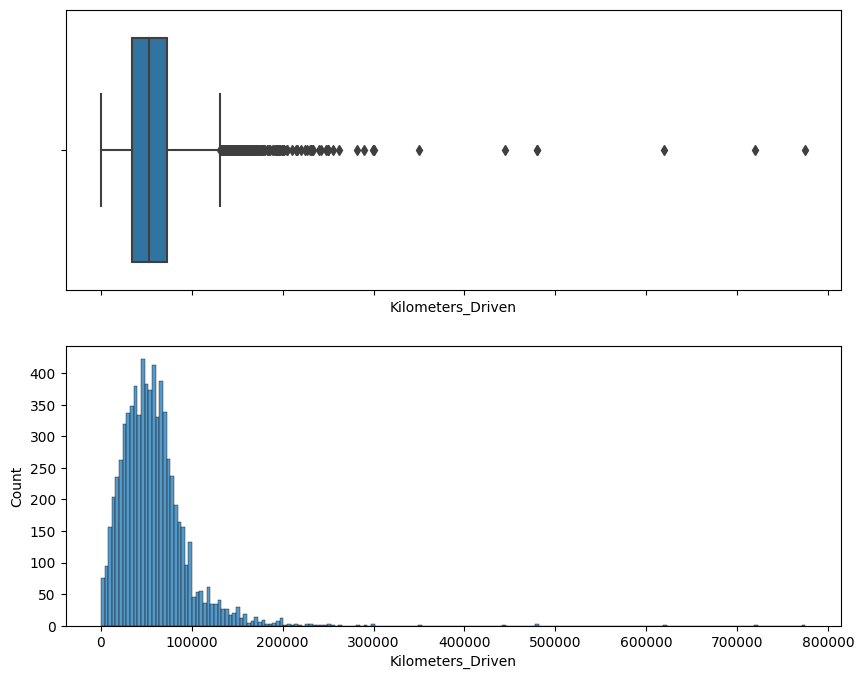

In [ ]:
# removing the extreme outlier from 'Kilopmeters_driven'
df = df[df['Kilometers_Driven'] < 6000000]
boxplot_histogram(df, 'Kilometers_Driven')

- Although there is still a strong right-skew, it is no where near as extreme as before.

- The majority of the vehicles have roughly around 40,000 - 60,000 Km

- The outliers begin after about 130,000 Km

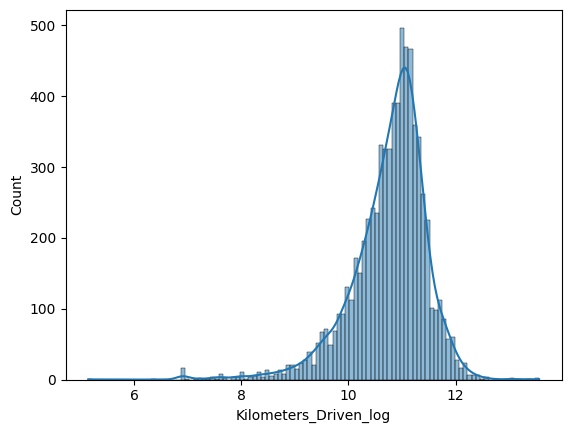

In [ ]:
# applying log transformation to 'Kilometers_Driven'
df['Kilometers_Driven_log'] = np.log(df['Kilometers_Driven'])

# plotting the distribution of 'Kilometers_Driven' after log transformation
sns.histplot(df.Kilometers_Driven_log, kde=True);

**Mileage**

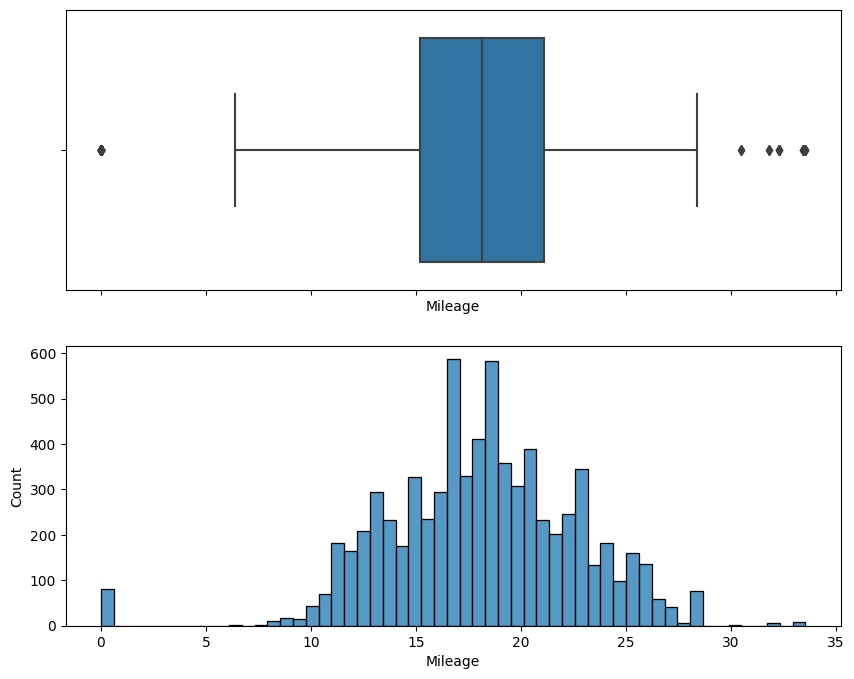

In [ ]:
boxplot_histogram(df, 'Mileage')

- There are a few outliers on the really low end and the higher end above 30 Km/L

- The distribution is multimodal with significant amounts around 16 Km/L and 18 Km/L

- Roughly normally distributed

**Engine**

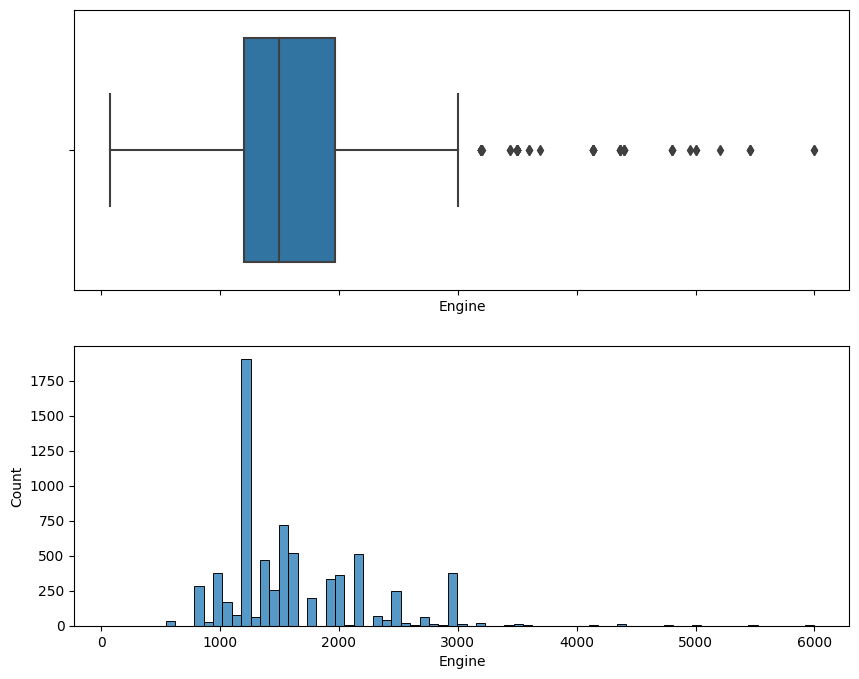

In [ ]:
boxplot_histogram(df, 'Engine')

- The overwhelming amount of vehicles have engine displacement figures around 1,200 cc

- Positively skewed

- Multimodal distribution with other significant amounts around 1,500 cc, 2,200 cc. and 3,000 cc

- Some outliers past 3,000 cc displacement

- It may be that 'Engine' should be converted to a categorical variable

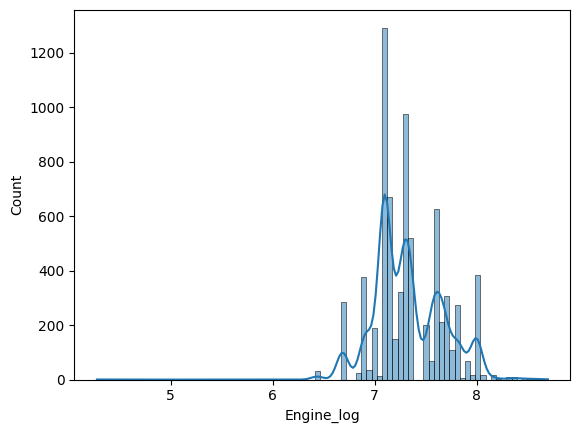

In [ ]:
# applying log transformation to 'Engine'
df['Engine_log'] = np.log(df['Engine'])

# plotting the distribution of 'Engine' after log transformation
sns.histplot(df.Engine_log, kde=True);

In [ ]:
statistic, p_value = shapiro(df.Engine_log)

alpha = 0.05  # Set the significance level

# Check for normality
if p_value > alpha:
    print("Normalized distribution (fail to reject H0)")
else:
    print("Not normalized (reject H0)")

Normalized distribution (fail to reject H0)


**Power**

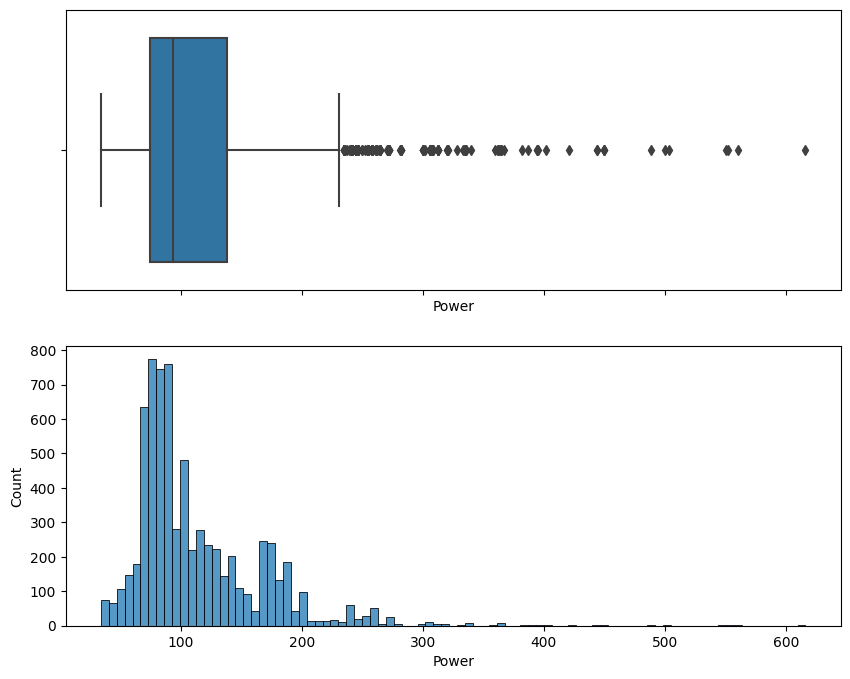

In [ ]:
boxplot_histogram(df, 'Power')

- Power is positively-skewed with outliers after roughly 225 BHP.

- Multimodal distribution with most vehicles having 50 - 80 BHP and a significant amount around 100 BHP. Another significant amount around 175 BHP.

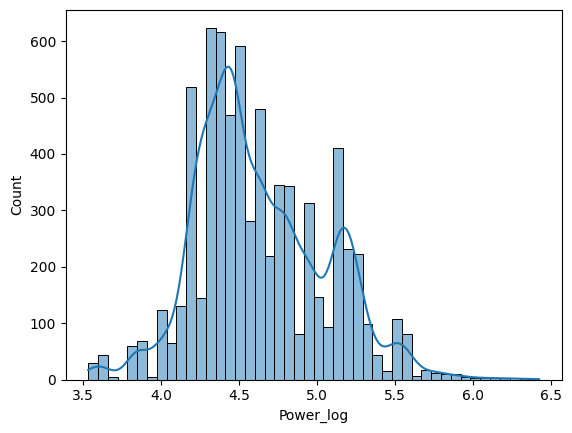

In [ ]:
# applying log transformation to 'Power'
df['Power_log'] = np.log(df['Power'])

# plotting the distribution of 'Power' after log transformation
sns.histplot(df.Power_log, kde=True);

In [ ]:
statistic, p_value = shapiro(df.Power_log)

alpha = 0.05  # Set the significance level

# Check for normality
if p_value > alpha:
    print("Normalized distribution (fail to reject H0)")
else:
    print("Not normalized (reject H0)")

Normalized distribution (fail to reject H0)


**Seats**

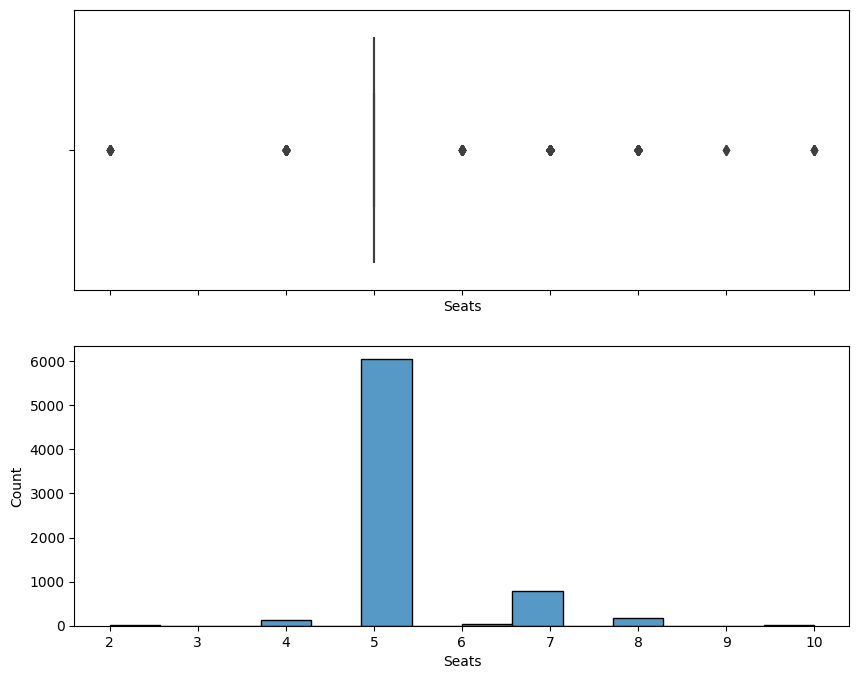

In [ ]:
boxplot_histogram(df, 'Seats')

- The overwhelming majority of vehicles have 5 seats with those with 7 seats coming in a distant second.

- There are very few vehicles with 2, 6, and 10 seats.

- There are no vehicles with 3 or 9 seats.

- This variable may be converted into a catergorical variable.

**New_Price**

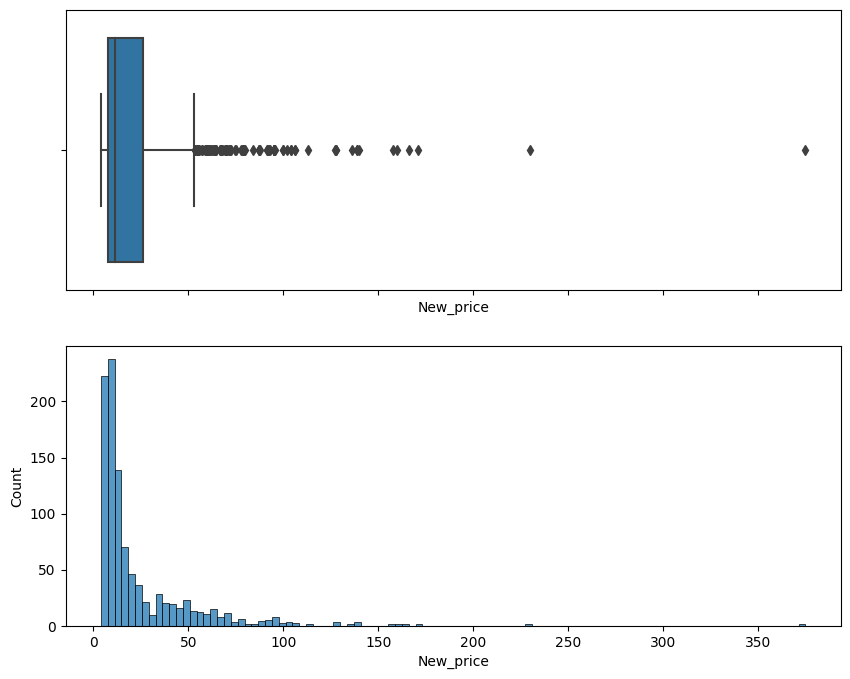

In [ ]:
boxplot_histogram(df, 'New_price')

- The price of a new vehicle is very postively-skewed.

- Many outliers above 5 million rupees

- Very few outliers above 20 million rupees

- Most new vehicles cost around 1 to 1.2 million rupees

- May drop this column due to 86% of the values missing

**Price**

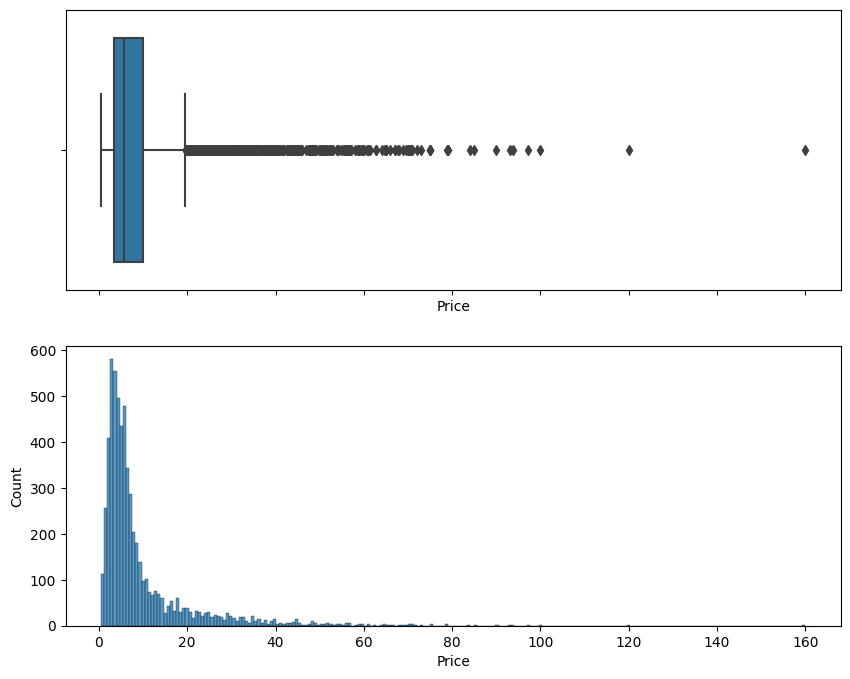

In [ ]:
boxplot_histogram(df, 'Price')

- Used car prices are also very postively-skewed, similare to new vehicle prices.

- Many outliers above 2 million rupees

- most of the used vehicles cost around 300,000 to 500,000 rupees

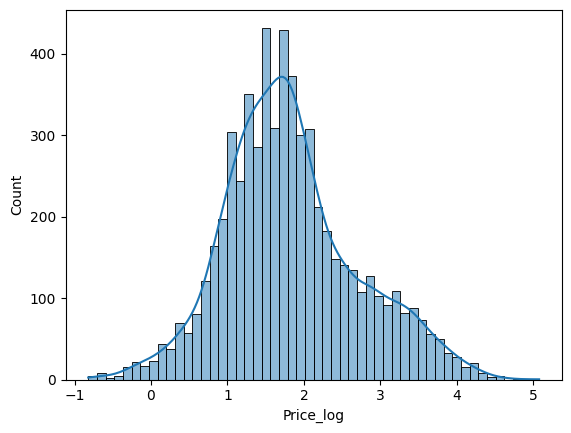

In [ ]:
# applying log transformation to 'Price'
df['Price_log'] = np.log(df['Price'])

# plotting the distribution of 'Price' after log transformation
sns.histplot(df.Price_log, kde=True);

In [ ]:
statistic, p_value = shapiro(df.Price_log)

alpha = 0.05  # Set the significance level

# Check for normality
if p_value > alpha:
    print("Normalized distribution (fail to reject H0)")
else:
    print("Not normalized (reject H0)")

Normalized distribution (fail to reject H0)


#### **Categorical Variable Analysis**

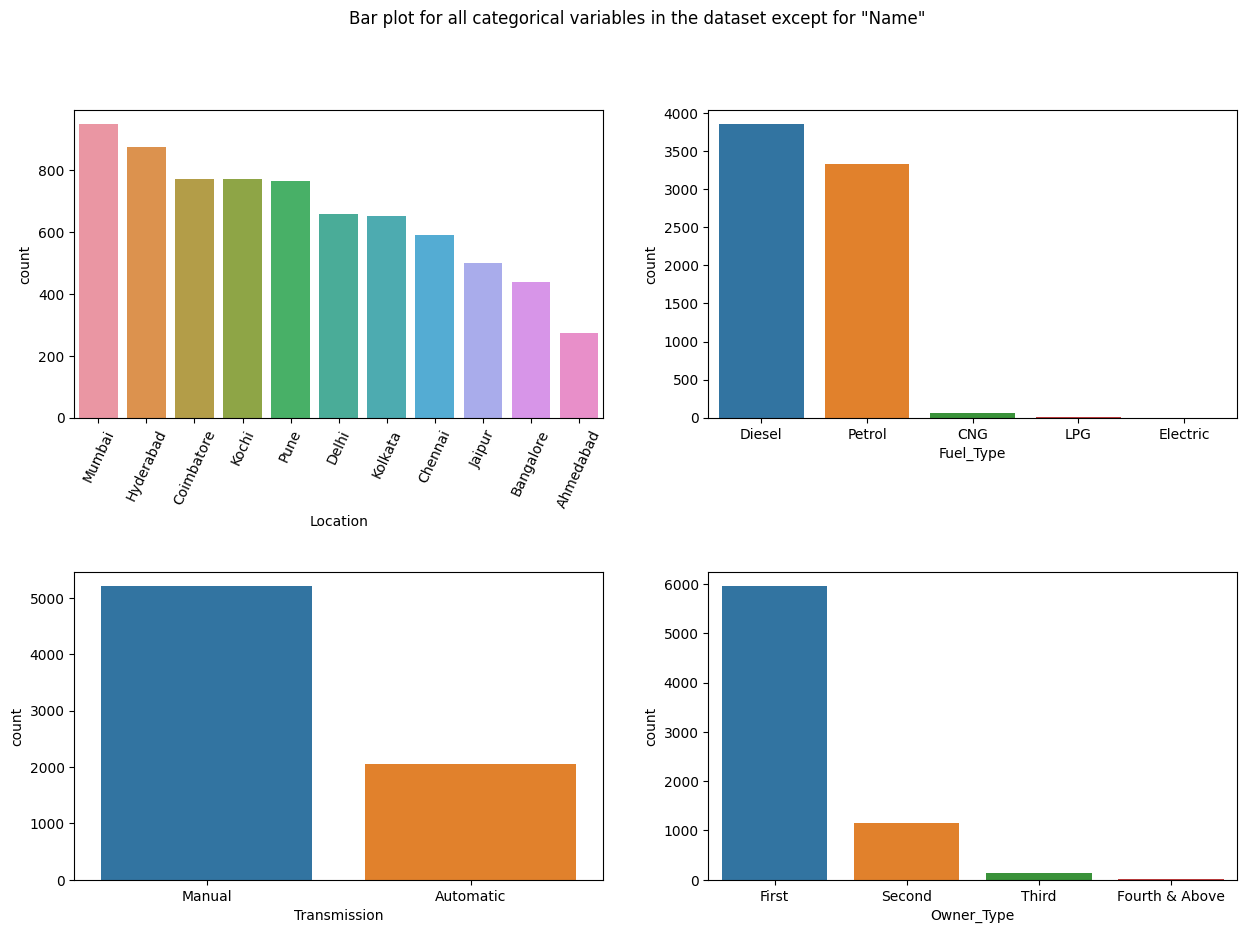

In [ ]:
# bar charts for categorical variable distribution
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

fig.suptitle('Bar plot for all categorical variables in the dataset except for "Name"')

sns.countplot(ax=axes[0, 0], x='Location', data=df, order=df['Location'].value_counts().index)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=65)

sns.countplot(ax = axes[0, 1], x = 'Fuel_Type', data = df,
              order = df['Fuel_Type'].value_counts().index);

sns.countplot(ax = axes[1, 0], x = 'Transmission', data = df,
              order = df['Transmission'].value_counts().index);

sns.countplot(ax = axes[1, 1], x = 'Owner_Type', data = df,
              order = df['Owner_Type'].value_counts().index);

# Adjust the spacing between subplots in the first and second rows
plt.subplots_adjust(hspace=0.5)

**Location**

- It is no surprise that Mumbai, being the most populous city in India, has the most vehicles for sale, followed by Hyderabad.

- It is surprising, however, that both Coimbatore and Kochi, although much less populated than the other cities, are virtually tied for third-most vehicles in their market.

**Fuel Type**

- The overwhelming amount of vehicles for sale are either diesel or petrol with diesel being the most numerous.

- CNG comes in a distant third and even then, there are not many.

- LPG has very, very few and it appears that there are little to no electric vehicles.

In [ ]:
# getting the electric vehicles
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Engine_log,Power_log,Price_log
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,10.819778,4.276666,3.713572,2.564949
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,10.691945,7.494430,4.290459,2.545531


- There are only 2 electric vehicles.



**Transmission**

- The majority of the vehicles have a manual transmission around 5,200 while automatic transmission is around 2,000

**Owner Type**

- The overwhelming majority of the used vehicles are those who have had only one owner, followed distantly by those with two owners, and even less for those with three owners. Finally, there are very, very few for those that have had at least four owners.

### **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps).
2. What can we infer from the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations.

**Numeric Numeric Analysis**

In [ ]:
# numerical against numerical variable scatterplot
def scatter(dataset, x, y):
  plt.figure(figsize = (10, 5))

  sns.scatterplot(df, x = x, y = y)

  plt.show()

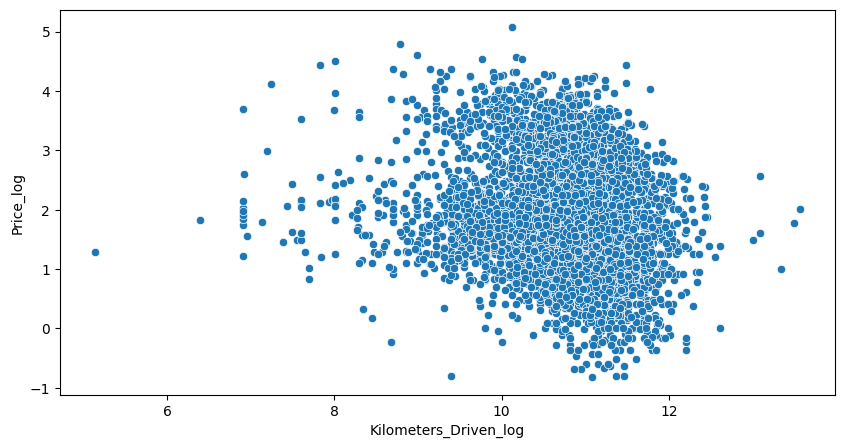

In [ ]:
scatter(df, 'Kilometers_Driven_log', 'Price_log')

- No discernible correlation between the number of kilometers driven and the used price, which is surprising.

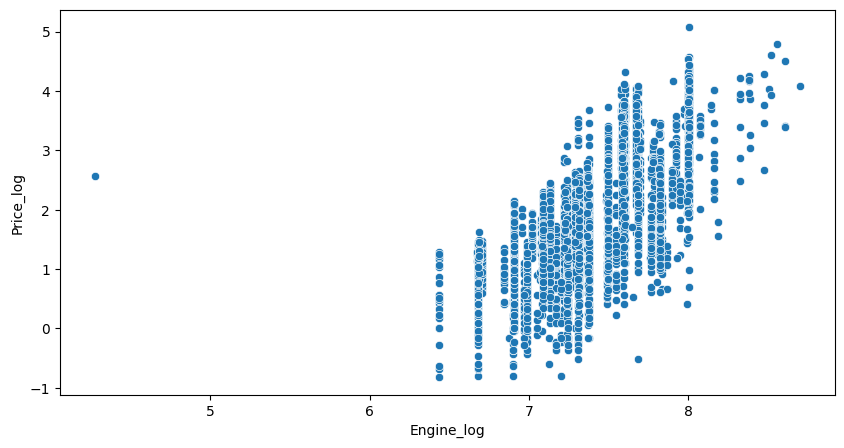

In [ ]:
scatter(df, 'Engine_log', 'Price_log')

- With an exception, as the engine output increases, so does the used price.

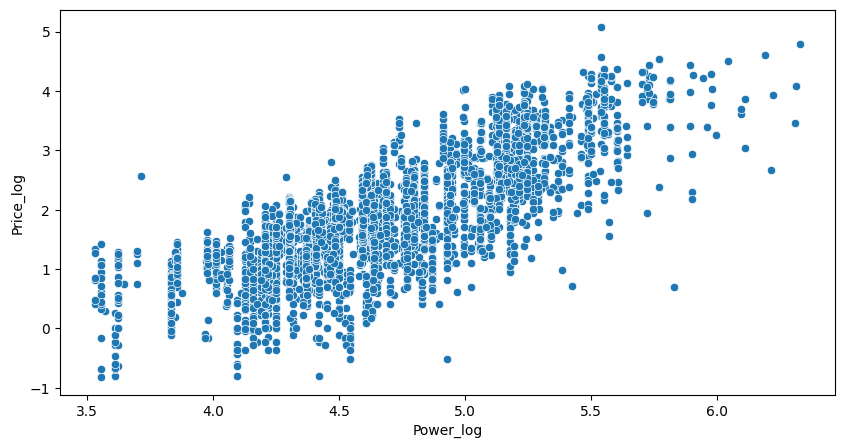

In [ ]:
scatter(df, 'Power_log', 'Price_log')

- The correlation between the vehicles power and it's used price is very low between 3.5 and 4.0 and above 4.0, we see that as the power increases, so does the used price.

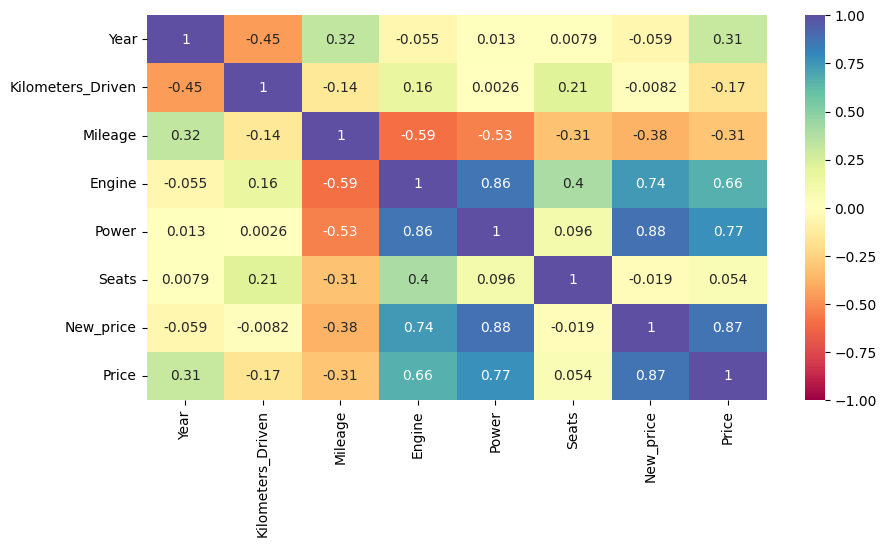

In [ ]:
# create a subset without the log transformation
df_sans_log = df.drop(['Kilometers_Driven_log', 'Engine_log', 'Power_log', 'Price_log'], axis = 1)

# check for correlation between numeric variables
plt.figure(figsize=(10,5))

sns.heatmap(df_sans_log.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)

plt.show();

- Moderate negative correlation between the engine displacement and the kilometers per liter(mileage)

- Moderate negative correlation between the power(BHP) and the kilometers per liter. This and the correlation above make sense as more powerful cars tend to displace more and thus tend to have lower Km/L

- **Very strong positive** correlation between the vehicles power and engine displacement. This makes sense as vehicles with higher BHP tend to create a higher engine displacement.

- Significant positive correlation between the price of a new vehicle and the engine's displacement.

- Moderate positive correlation between the price of a used vehicle and the engine's displacement.

- **Very strong positive** correlation between the power(BHP) and the price of a new vehicle.

- Significant positive correlation between the power(BHP) and the price of a used vehicle.

- **Very strong** correlation between a vehicles new price and it's used price.

- **New_price**, **Power**, and **Engine** are the only three variables with high to moderate correlation, respectively, with the dependent variable, **Price**

**Numeric Categoric Analysis**

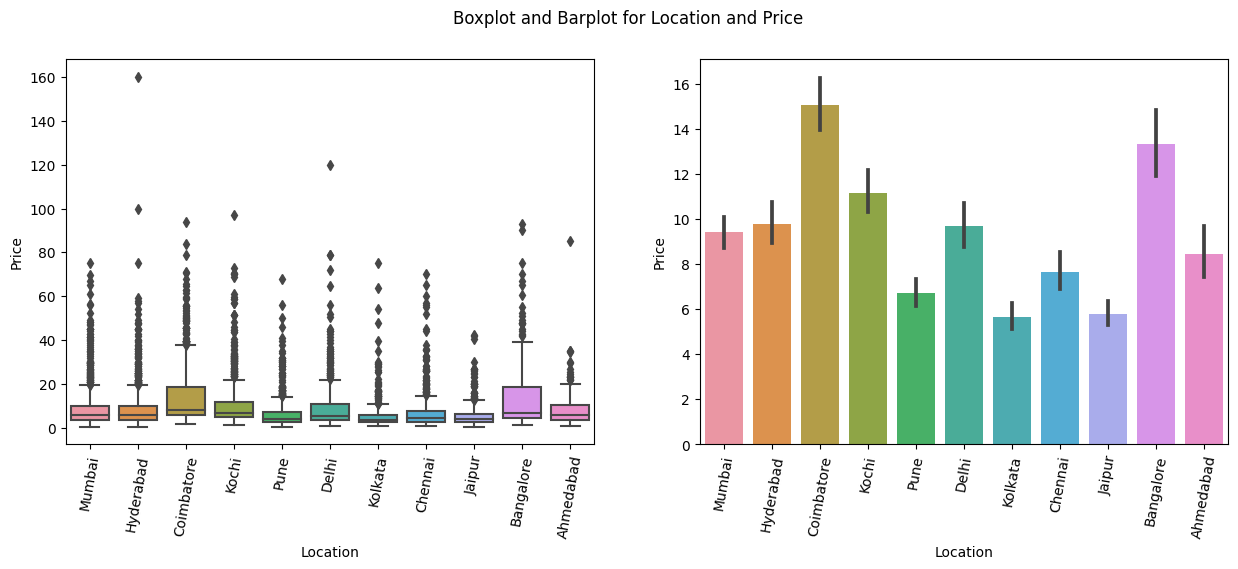

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Boxplot and Barplot for Location and Price')

sns.boxplot(df, x='Location', y='Price', order=df['Location'].value_counts().index, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)

sns.barplot(df, x='Location', y='Price', order=df['Location'].value_counts().index, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=80)

plt.show()

- All cities have many outliers but Hyderabad has the biggest outlier, followed by Delhi.

- Coimbatore and Bangalore on average have the most expensive vehicles.

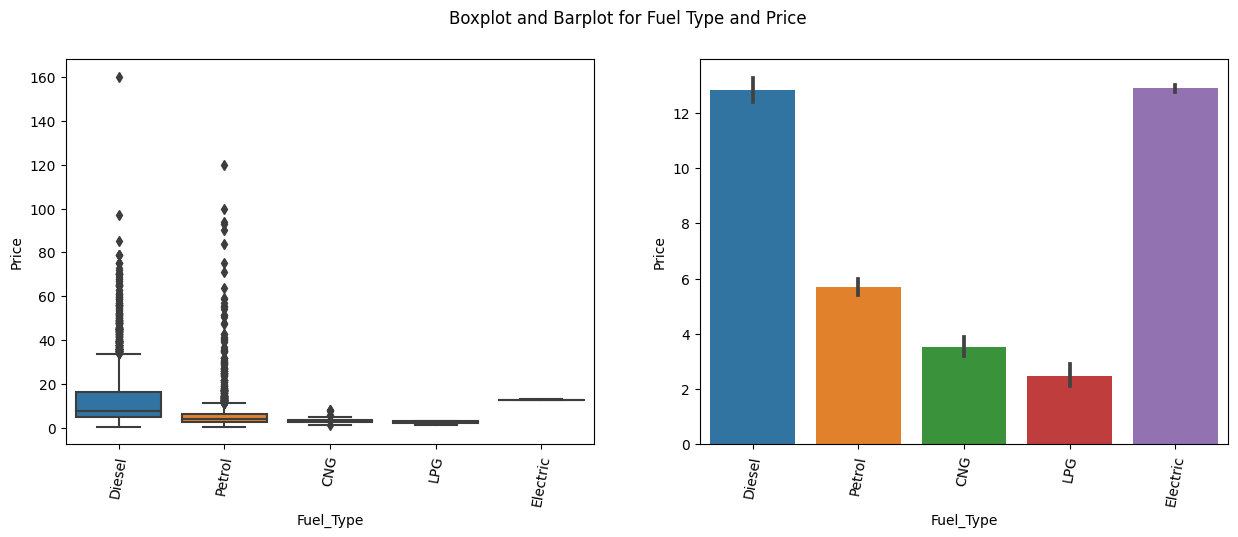

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Boxplot and Barplot for Fuel Type and Price')

sns.boxplot(df, x='Fuel_Type', y='Price', order=df['Fuel_Type'].value_counts().index, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)

sns.barplot(df, x='Fuel_Type', y='Price', order=df['Fuel_Type'].value_counts().index, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=80)

plt.show()

- Diesel and Petrol have the vehicles with the highest price and with many outliers

- Diesel and Electric have the highest average price for used vehicles

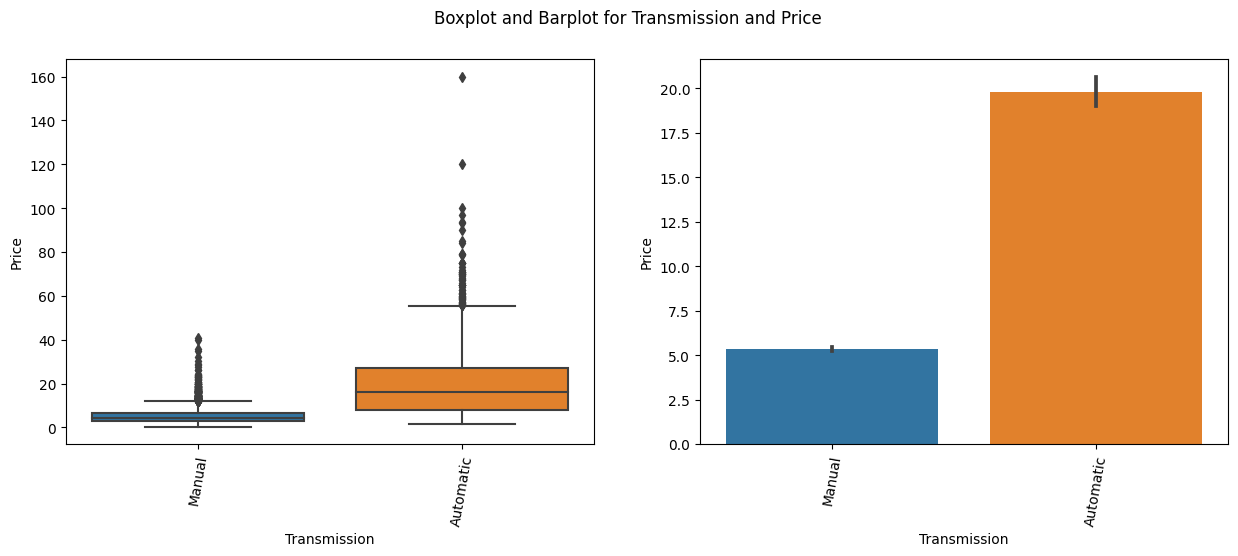

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Boxplot and Barplot for Transmission and Price')

sns.boxplot(df, x='Transmission', y='Price', order=df['Transmission'].value_counts().index, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)

sns.barplot(df, x='Transmission', y='Price', order=df['Transmission'].value_counts().index, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=80)

plt.show()

- Automatic transmissions have the higher average price and also larger outliers. Vehicles of automatic transmission tend to have higher prices so no surprise there.

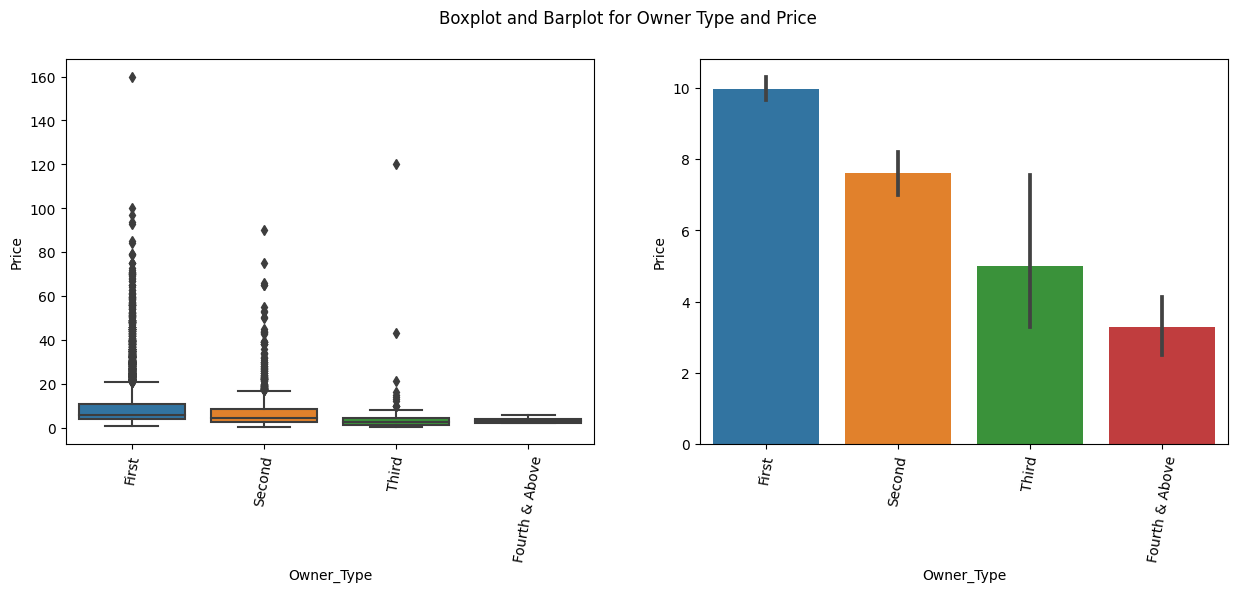

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Boxplot and Barplot for Owner Type and Price')

sns.boxplot(df, x='Owner_Type', y='Price', order=df['Owner_Type'].value_counts().index, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)

sns.barplot(df, x='Owner_Type', y='Price', order=df['Owner_Type'].value_counts().index, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=80)

plt.show()

- The average used vehicle price is higher for vehicles with at least one owner and goes down with the second, third, and fourth and above.

- The vehicles with one and three owners have significant outliers.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [ ]:
# setting 'Name' to just the brand name and adding that column
df['Make'] = df['Name'].str.split(' ').str[0]

In [ ]:
# validate that the column 'Make' has been added
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Engine_log,Power_log,Price_log,Make
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,6.905753,4.063198,0.559616,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,7.366445,4.837868,2.525729,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,7.089243,4.485260,1.504077,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,7.129298,4.485936,1.791759,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,7.584773,4.947340,2.875822,Audi


In [ ]:
# replace 'ISUZU' with 'Isuzu' to keep the names the same
df['Make'].replace('ISUZU', 'Isuzu', inplace=True)

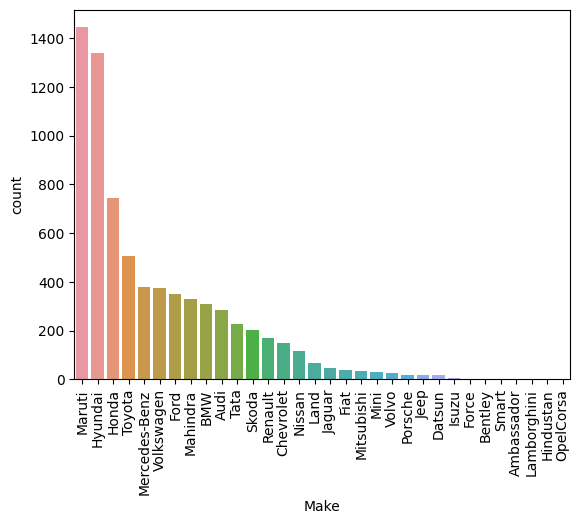

In [ ]:
# check univariate analysis of brand name
def bar_chart(feature, figsize = (15, 10)):
  sns.countplot(data=feature, x=feature, order = feature.value_counts().index);
  plt.xticks(rotation=90)
  plt.show()

bar_chart(df.Make)

- After extracting just the brand name of the vehicle manufacturers and performing univariate categorical analysis, we see that the brands with the most vehicles on the market are: **Maruti**, **Hyundai**, **Honda**, and **Toyota**, respectively.

- The brands with the lease amount of vehicles on the market are: **Isuzu**, **Force**, **Bentley**, **Smart**, **Ambassador**, **Lamborghini**, **Hindustan**, and **OpelCorsa**, respectively.

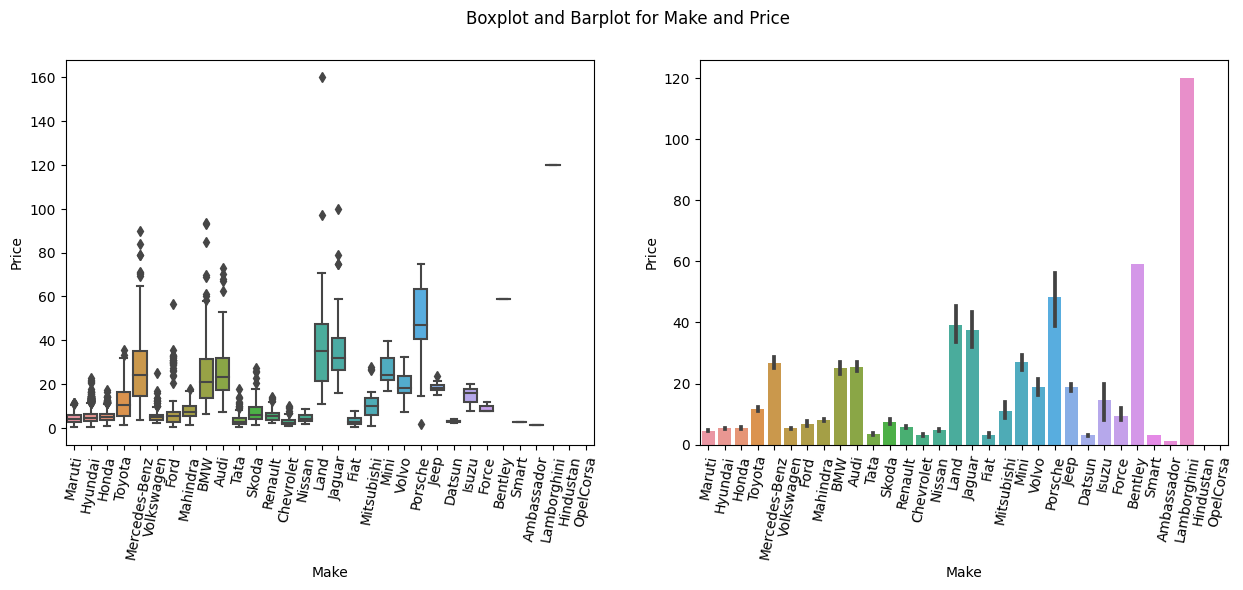

In [ ]:
# check bivariate analysis of brand name
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Boxplot and Barplot for Make and Price')

sns.boxplot(df, x='Make', y='Price', order=df['Make'].value_counts().index, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)

sns.barplot(df, x='Make', y='Price', order=df['Make'].value_counts().index, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=80)

plt.show()

- Earlier we saw that Maruti's are the most numerous vehicles for sale and they are also among the most-affordable.

- Unsurprisingly, the most expensive brand is Lamborghini followed by Bentley and other German and British brands.

### **Missing value treatment**

#### **Mileage**

- There are 2 values with explicit null values that need to be imputed for 'Mileage' and they are both from electric vehicles, however, as noted previously, there are also some values for Mileage that are 0 and must be imputed.

In [ ]:
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Engine_log,Power_log,Price_log,Make
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,10.819778,4.276666,3.713572,2.564949,Mahindra
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,10.691945,7.494430,4.290459,2.545531,Toyota


- Since there are only two electric vehicles(The Toyota may actually be a hybrid), and based on further research, will impute them based off a conversion estimate from Km/charge to Km/L to better match the other values.

In [ ]:
# impute the mileage(Km/L) of the Mahindra E Verito D4
df.loc[4446, 'Mileage'] = 2.8

# impute the mileage(Km/L) of the Toyota Prius 2009-2016 Z4
df.loc[4904, 'Mileage'] = 20

In [ ]:
sum(df['Mileage'] == 0)

81

- There are 81 records with 'Mileage' set to 0

- Will use the relationship between fuel type, transmission, and Mileage in order to impute in a targeted fashion.

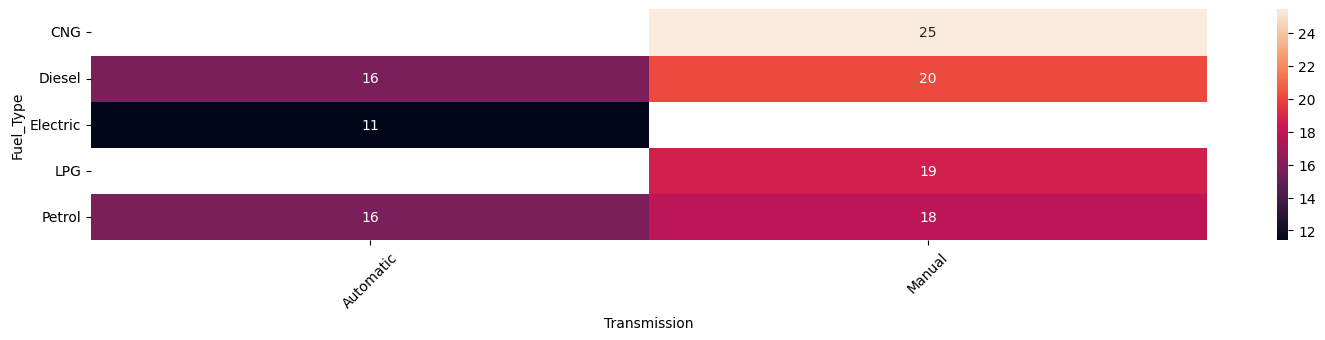

In [ ]:
# relationship between Fuel Type, Transmission, and Mileage
fig = plt.figure(figsize = (18, 3))

sns.heatmap(df.pivot_table(index = 'Fuel_Type', columns = 'Transmission', values = 'Mileage'), annot = True);

plt.xticks(rotation = 45);

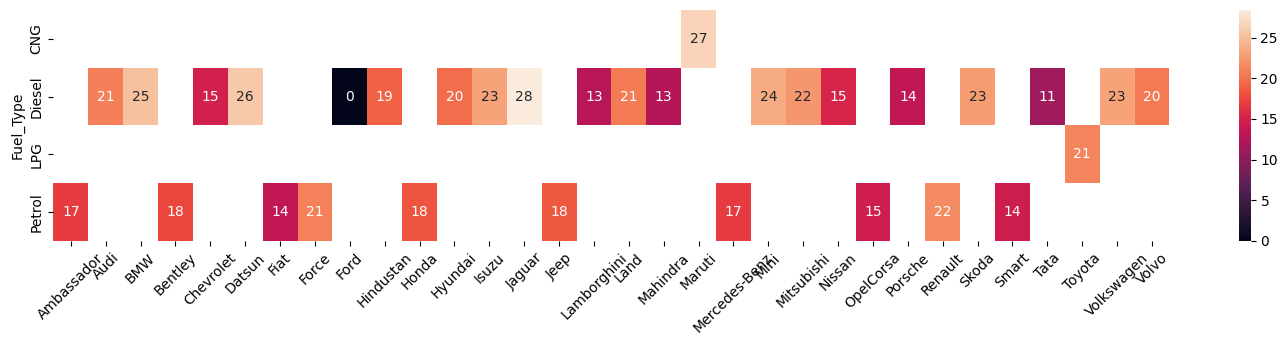

In [ ]:
# relationship between Fuel Type, Make, and Mileage
unique_names = pd.Series(df['Make'].unique())

fig = plt.figure(figsize = (18, 3))

sns.heatmap(df.pivot_table(index = 'Fuel_Type', columns = unique_names, values = 'Mileage'), annot = True);

plt.xticks(rotation = 45);

In [ ]:
# set the values that are 0 for Ambassador or Mercedes-Benz and petrol to 17
df.loc[(df['Mileage'] == 0) & ((df['Make'] == 'Ambassador') | (df['Make'] == 'Mercedes-Benz')) & (df['Fuel_Type'] == 'Petrol'), 'Mileage'] = 17

# set the values that are 0 for Audi or Land and diesel to 21
df.loc[(df['Mileage'] == 0) & ((df['Make'] == 'Audi') | (df['Make'] == 'Land')) & (df['Fuel_Type'] == 'Diesel'), 'Mileage'] = 21

# set the values that are 0 for BMW and diesel and manual to 25
df.loc[(df['Mileage'] == 0) & (df['Make'] == 'BMW') & (df['Fuel_Type'] == 'Diesel') & (df['Transmission'] == 'Manual'), 'Mileage'] = 25

# set the values that are 0 for Bentley or Honda or Jeep and manual and petrol to 18
df.loc[(df['Mileage'] == 0) & ((df['Make'] == 'Bentley') | (df['Make'] == 'Honda') | (df['Make'] == 'Jeep')) & (df['Fuel_Type'] == 'Petrol') & (df['Transmission'] == 'Manual'), 'Mileage'] = 18

# set the values that are 0 for Chevrolet or Nissan and diesel to 15
df.loc[(df['Mileage'] == 0) & ((df['Make'] == 'Chevrolet') | (df['Make'] == 'Nissan')) & (df['Fuel_Type'] == 'Diesel'), 'Mileage'] = 15

# set the values that are 0 for Datsun and diesel to 26
df.loc[(df['Mileage'] == 0) & (df['Make'] == 'Datsun') & (df['Fuel_Type'] == 'Diesel'), 'Mileage'] = 26

# set the values that are 0 for Fiat or Smart and petrol to 14
df.loc[(df['Mileage'] == 0) & ((df['Make'] == 'Fiat') | (df['Make'] == 'Smart')) & (df['Fuel_Type'] == 'Petrol'), 'Mileage'] = 14

# set the values that are 0 for Force or Renault and petrol to 21.5
df.loc[(df['Mileage'] == 0) & ((df['Make'] == 'Force') | (df['Make'] == 'Renault')) & (df['Fuel_Type'] == 'Petrol'), 'Mileage'] = 21.5

# set the values that are 0 for Hindustan and diesel to 19
df.loc[(df['Mileage'] == 0) & (df['Make'] == 'Hindustan') & (df['Fuel_Type'] == 'Diesel'), 'Mileage'] = 19

# set the values that are 0 for Hyundai or Volvo and diesel and manual to 20
df.loc[(df['Mileage'] == 0) & ((df['Make'] == 'Hyundai') | (df['Make'] == 'Volvo')) & (df['Fuel_Type'] == 'Diesel') & (df['Transmission'] == 'Manual'), 'Mileage'] = 20

# set the values that are 0 for Isuzu or Skoda or Volswagen or Mini and diesel to 23.5
df.loc[(df['Mileage'] == 0) & ((df['Make'] == 'Isuzu') | (df['Make'] == 'Skoda') | (df['Make'] == 'Volkswagen') | (df['Make'] == 'Mini')) & (df['Fuel_Type'] == 'Diesel'), 'Mileage'] = 23.5

# set the values that are 0 for Jaguar and diesel to 28
df.loc[(df['Mileage'] == 0) & (df['Make'] == 'Jaguar') & (df['Fuel_Type'] == 'Diesel'), 'Mileage'] = 28

# set the values that are 0 for Lamborghini or Mahindra and diesel to 13
df.loc[(df['Mileage'] == 0) & ((df['Make'] == 'Lamborghini') | (df['Make'] == 'Mahindra')) & (df['Fuel_Type'] == 'Diesel'), 'Mileage'] = 13

# set the values that are 0 for Maruti and CNG to 27
df.loc[(df['Mileage'] == 0) & (df['Make'] == 'Maruti') & (df['Fuel_Type'] == 'CNG'), 'Mileage'] = 27

# set the values that are 0 for Mitsubishi and diesel to 22
df.loc[(df['Mileage'] == 0) & (df['Make'] == 'Mitsubishi') & (df['Fuel_Type'] == 'Diesel'), 'Mileage'] = 22

# set the values that are 0 for OpelCorsa and petrol to 15
df.loc[(df['Mileage'] == 0) & (df['Make'] == 'OpelCorsa') & (df['Fuel_Type'] == 'Petrol'), 'Mileage'] = 15

# set the values that are 0 for Porsche and diesel to 14
df.loc[(df['Mileage'] == 0) & (df['Make'] == 'Porsche') & (df['Fuel_Type'] == 'Diesel'), 'Mileage'] = 14

# set the values that are 0 for Tata and diesel to 11
df.loc[(df['Mileage'] == 0) & (df['Make'] == 'Tata') & (df['Fuel_Type'] == 'Diesel'), 'Mileage'] = 11

# set the values that are 0 for Toyota and LPG to 21
df.loc[(df['Mileage'] == 0) & (df['Make'] == 'Toyota') & (df['Fuel_Type'] == 'LPG'), 'Mileage'] = 21


#### **Engine**

- Will use the relationship between fuel type, transmission, and the engine displacement in order to impute in a targeted fashion.

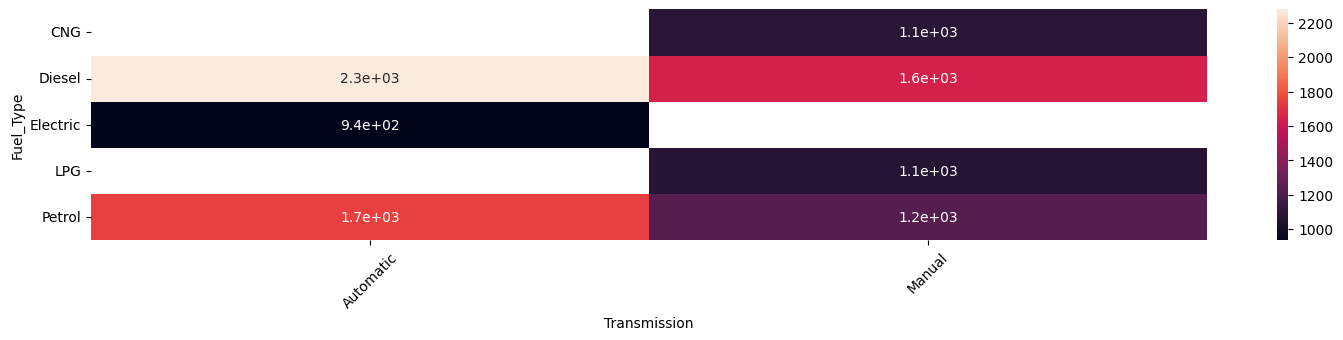

In [ ]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(df.pivot_table(index = 'Fuel_Type', columns = 'Transmission', values = 'Engine'), annot = True);

plt.xticks(rotation = 45);

In [ ]:
# set the null values for engine where the fuel type is diesel and the transmission is automatic to 2,300
df.loc[(df['Engine'].isnull()) & (df['Fuel_Type'] == 'Diesel') & (df['Transmission'] == 'Automatic'), 'Engine'] = 2300

# set the null values for engine where the fuel type is petrol and the transmission is automatic to 1,700
df.loc[(df['Engine'].isnull()) & (df['Fuel_Type'] == 'Petrol') & (df['Transmission'] == 'Automatic'), 'Engine'] = 1700

# set the null values for engine where the fuel type is CNG and the transmission is manual to 1,100
df.loc[(df['Engine'].isnull()) & (df['Fuel_Type'] == 'CNG') & (df['Transmission'] == 'Manual'), 'Engine'] = 1100

# set the null values for engine where the fuel type is diesel and the transmission is manual to 1,600
df.loc[(df['Engine'].isnull()) & (df['Fuel_Type'] == 'Diesel') & (df['Transmission'] == 'Manual'), 'Engine'] = 1600

# set the null values for engine where the fuel type is LPG and the transmission is manual to 1,100
df.loc[(df['Engine'].isnull()) & (df['Fuel_Type'] == 'LPG') & (df['Transmission'] == 'Manual'), 'Engine'] = 1100

# set the null values for engine where the fuel type is petrol and the transmission is manual to 1,200
df.loc[(df['Engine'].isnull()) & (df['Fuel_Type'] == 'Petrol') & (df['Transmission'] == 'Manual'), 'Engine'] = 1200

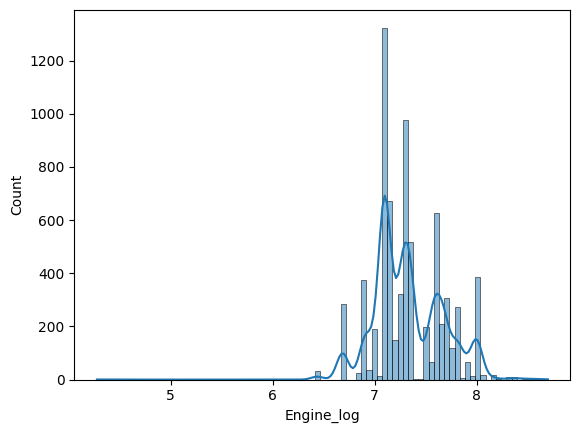

In [ ]:
# setting engine log again after imputation
df['Engine_log'] = np.log(df['Engine'])

sns.histplot(df.Engine_log, kde=True);

#### **Power**

- Similar to Engine, will use the relationship between Fuel Type, Transmission, and Power to impute missing Power values.

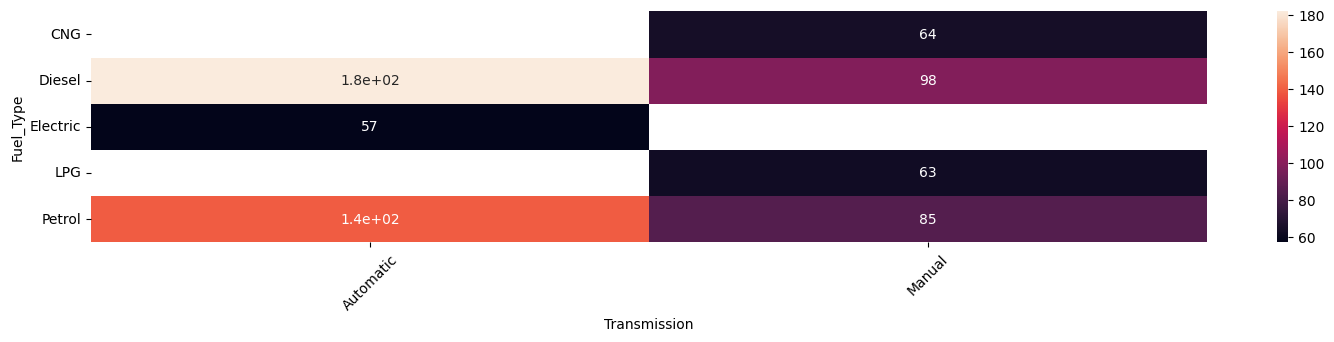

In [ ]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(df.pivot_table(index = 'Fuel_Type', columns = 'Transmission', values = 'Power'), annot = True);

plt.xticks(rotation = 45);

In [ ]:
# set the null values for power where the fuel type is diesel and the transmission is automatic to 180
df.loc[(df['Power'].isnull()) & (df['Fuel_Type'] == 'Diesel') & (df['Transmission'] == 'Automatic'), 'Power'] = 180

# set the null values for power where the fuel type is petrol and the transmission is automatic to 140
df.loc[(df['Power'].isnull()) & (df['Fuel_Type'] == 'Petrol') & (df['Transmission'] == 'Automatic'), 'Power'] = 140

# set the null values for power where the fuel type is CNG and the transmission is manual to 64
df.loc[(df['Power'].isnull()) & (df['Fuel_Type'] == 'CNG') & (df['Transmission'] == 'Manual'), 'Power'] = 64

# set the null values for power where the fuel type is diesel and the transmission is manual to 98
df.loc[(df['Power'].isnull()) & (df['Fuel_Type'] == 'Diesel') & (df['Transmission'] == 'Manual'), 'Power'] = 98

# set the null values for power where the fuel type is LPG and the transmission is manual to 63
df.loc[(df['Power'].isnull()) & (df['Fuel_Type'] == 'LPG') & (df['Transmission'] == 'Manual'), 'Power'] = 63

# set the null values for power where the fuel type is petrol and the transmission is manual to 85
df.loc[(df['Power'].isnull()) & (df['Fuel_Type'] == 'Petrol') & (df['Transmission'] == 'Manual'), 'Power'] = 85

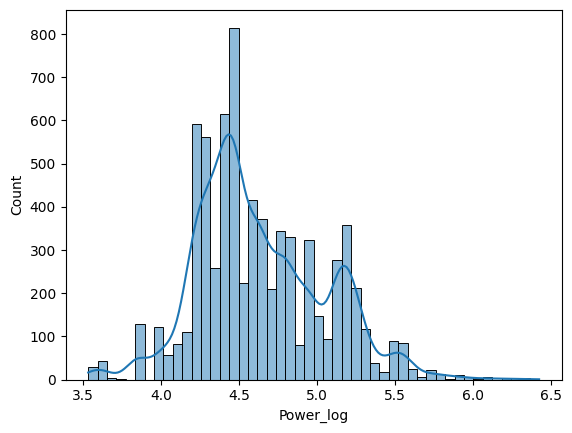

In [ ]:
# setting power log again after imputation
df['Power_log'] = np.log(df['Power'])

sns.histplot(df.Power_log, kde=True);

#### **Seats**

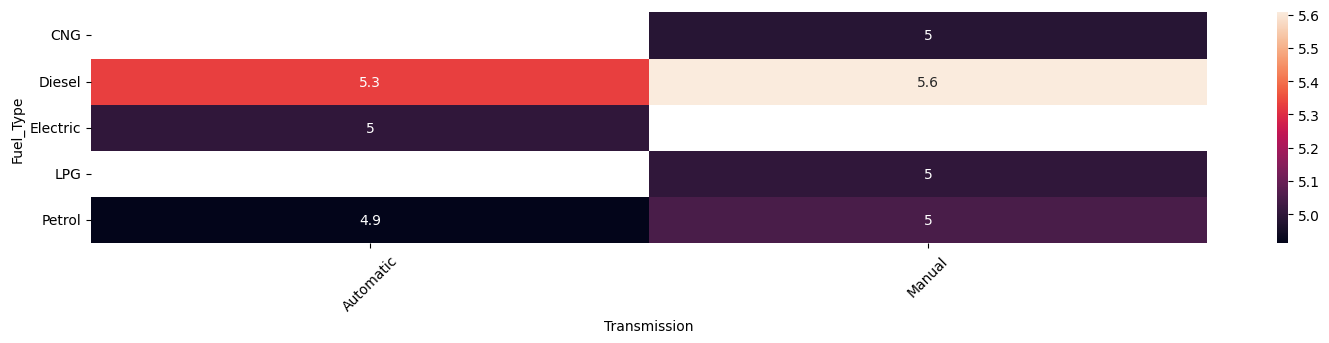

In [ ]:
# Relationship between Fuel Type, Transmission, and Seats to impute missing Seats values
fig = plt.figure(figsize = (18, 3))

sns.heatmap(df.pivot_table(index = 'Fuel_Type', columns = 'Transmission', values = 'Seats'), annot = True);

plt.xticks(rotation = 45);

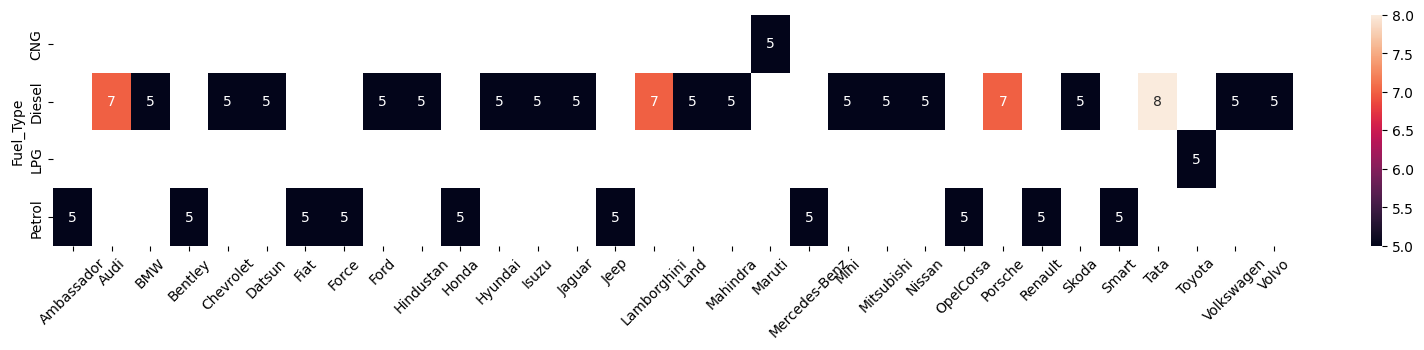

In [ ]:
# Relationship between Fuel Type, Make, and Seats to impute missing Seats values

fig = plt.figure(figsize = (20, 3))

sns.heatmap(df.pivot_table(index = 'Fuel_Type', columns = unique_names, values = 'Seats'), annot = True);

plt.xticks(rotation = 45);

- There are only 53 missing values for 'Seats' and it appears most of those would be five-seaters as most vehicles in inventory are five-seaters.

- Those that have 7 or more seats are exclusively diesel vehicles

- However, we can impute those that have 7 or more seats based on Engine displacement, Power, and Fuel Type diesel as those with higher values of the same tend to have 7 or more seats.

In [ ]:
# get the minimum value for Engine where seats >= 7
print('Engine minimum: ', df_copy[df_copy['Seats'] >= 7]['Engine'].min())

# get the minimum value for Power where seats >= 7
print('Power minimum: ', df_copy[df_copy['Seats'] >= 7]['Power'].min())

Engine minimum:  796.0
Power minimum:  34.2


In [ ]:
# setting null values for seats where engine >= 796, power >= 34, and fuel type is diesel to 7
df.loc[(df['Seats'].isnull()) & (df['Engine'] >= 796) & (df['Power'] >= 34) & (df['Fuel_Type'] == 'Diesel'), 'Seats'] = 7

# setting the remaining null values for seats to 5
df.loc[(df['Seats'].isnull()), 'Seats'] = 5

#### **New Price**

In [ ]:
sum(df['New_price'].isnull()) / df.shape[0] * 100

86.12796469939326

- 86% of the data for 'New_price' is missing

- Since so much of the data is missing, I opt to try moving forward by dropping the column.

In [ ]:
df = df.drop('New_price', axis = 1)

#### **Price**

In [ ]:
sum(df['Price'].isnull()) / df.shape[0] * 100

17.01599558742416

In [ ]:
'''
Since a relatiely small amount(17%) of the used prices are missing, it's the target variable and
imputing the values would introduce bias and therefore affect the predictions
of the models, these records will be dropped
'''
df = df.dropna(subset=['Price'])

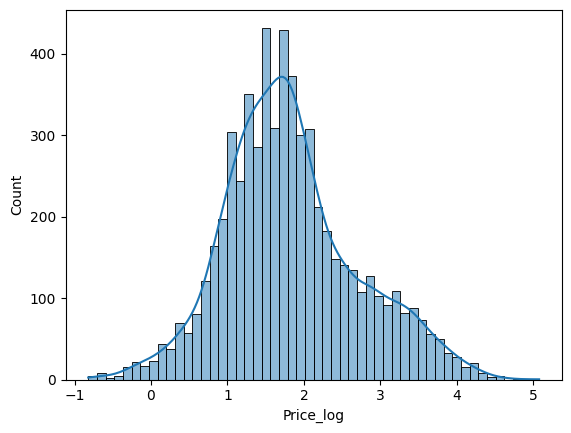

In [ ]:
# applying log transformation to 'Price' again
df['Price_log'] = np.log(df['Price'])

# plotting the distribution of 'Price' after log transformation
sns.histplot(df.Price_log, kde=True);

In [ ]:
# validating there are no more missing values
df.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                    0
Kilometers_Driven_log    0
Engine_log               0
Power_log                0
Price_log                0
Make                     0
dtype: int64

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

**Geographical Distribution**: The dataset contains cities primarily from the South, West, and Northwest regions of India, with Kolkata representing the East. It lacks representation from the country's center and far Northeast.

**Vehicle Representation and Popularity**: Most cities included are highly populous, except for Coimbatore and Kochi, which are comparatively less populated but have a substantial number of vehicles for sale.

**Fuel Types and Owner Types**: The dataset includes five fuel types (Petrol, Diesel, Electric, CNG, LPG) and four owner types (first, second, third, fourth & above).

**Manufacturing Year and Price Analysis**: Vehicles from older years are prevalent in the dataset, mainly before 2004. The most abundant years for sale are between 2010 and 2017. Price distributions vary across different cities and fuel types, with diesel and petrol vehicles having higher prices.

**Seating Capacity and Transmission Type**: Most vehicles have 5 seats and are predominantly manual transmission, with few variations having 7 seats or automatic transmissions.

**Correlation Findings**: Strong correlations exist between engine displacement, power (BHP), new and used prices, and mileage. Vehicles with higher BHP tend to have larger engine displacements and higher prices.

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

- 'Name' should be dropped as it contains too many unique values and therefore not helpful with predictive analysis. Also, the Make(Brand) will be used instead as the unique values are much smaller.

- 'Price' and 'Price_log' must be dropped as these are the target variable.

- 'Kilometers_Driven' will be dropped as no significant correlation between it and the target variable, 'Price', was found.

- Will also drop the independent variables' log versions as those are not required before using them to train a model

In [ ]:
# making a copy of df after imputation of missing values
df_copy = df.copy()

# declare dependent variable
train_target = df['Price']

train_target_log = df['Price_log']

# set the independent variables
train_features = df.drop(['Name', 'Price', 'Price_log', 'Kilometers_Driven', 'Kilometers_Driven_log', 'Engine_log', 'Power_log'], axis=1)

In [ ]:
# Creating dummy variables for the categorical variables
train_features = pd.get_dummies(train_features, drop_first = True)

In [ ]:
# validate the one-hot encoding
train_features.head()

,Year,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,2010,26.60,998.0,58.16,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,19.67,1582.0,126.20,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,18.20,1199.0,88.70,5.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,20.77,1248.0,88.76,7.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,15.20,1968.0,140.80,5.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)

# the above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)

In [ ]:
# split the data into 80/20 training/test sets
X_train, X_test, y_train, y_test = train_test_split(train_features_scaled, train_target_log, test_size = 0.20, random_state = 1)

### **Parameter Estimation**

#### **Functions for model evaluation**

In [ ]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def check_model_performance(model, predictors, target):

    pred = model.predict(predictors)

    df_perf = {
        'r-squared': r2_score(target, pred),
        'adjusted r-squared': adj_r2_score(predictors, target, pred),
        'RSME': np.sqrt(mean_squared_error(target, pred)),
        'MAE': mean_absolute_error(target, pred),
        'MAPE': mape_score(target, pred)
    }

    return df_perf

# comparing training and test performance
def compare_model_training_test_performance(model_name, model):
  print(f'Training metrics {model_name}:', check_model_performance(model, X_train, y_train))
  print(f'Testing metrics {model_name}: ', check_model_performance(model, X_test, y_test))

In [ ]:
# add the intercept coefficient
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# OLS model to estimate the parameters for linear regression
ols_model_1 = sm.OLS(y_train, X_train).fit()

print(ols_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1084.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:51:16   Log-Likelihood:                -22.102
No. Observations:                4814   AIC:                             150.2
Df Residuals:                    4761   BIC:                             493.6
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
check_model_performance(ols_model_1, X_train, y_train)

{'r-squared': 0.922087050623997,
 'adjusted r-squared': 0.9212195324901885,
 'RSME': 0.24308420426141134,
 'MAE': 0.1797981586970078,
 'MAPE': inf}

In [ ]:
compare_model_training_test_performance('OLS model 1', ols_model_1)

Training metrics OLS model 1: {'r-squared': 0.922087050623997, 'adjusted r-squared': 0.9212195324901885, 'RSME': 0.24308420426141134, 'MAE': 0.1797981586970078, 'MAPE': inf}
Testing metrics OLS model 1:  {'r-squared': 0.9291439482871523, 'adjusted r-squared': 0.9258784085125602, 'RSME': 0.23527729908119602, 'MAE': 0.18051742949159078, 'MAPE': inf}


- The r-squared value is 0.92, which is means the variables capture 92% of the variance

- The model performs slightly better in the testing set than the training indicating a good generalization and the model is not overfitting.

- The presence of zeros from the dummy variables is causing the MAPE function to output 'inf'

#### **Multicolinearity**

In [ ]:
# checking for mulitcolinearity of independent variables using VIF. Want < 5 VIF Score
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index = X_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                        5164.661052
Year                            1.679273
Mileage                         3.162858
Engine                         10.212913
Power                           9.356003
Seats                           2.445019
Location_Bangalore              2.394648
Location_Chennai                2.857373
Location_Coimbatore             3.475293
Location_Delhi                  3.094919
Location_Hyderabad              3.725970
Location_Jaipur                 2.616503
Location_Kochi                  3.440243
Location_Kolkata                3.070626
Location_Mumbai                 3.911883
Location_Pune                   3.284285
Fuel_Type_Diesel               28.148978
Fuel_Type_Electric              1.030300
Fuel_Type_LPG                   1.171080
Fuel_Type_Petrol               28.949675
Transmission_Manual             2.252319
Owner_Type_Fourth & Above       1.011701
Owner_Type_Second               1.177265
Owner_Type_Third                1.139604
Ma

- Will begin with looking at numerical variables and 'Engine' has the highest score above 5 so this variable will be removed first

In [ ]:
# drop 'Engine' column
X_train = X_train.drop('Engine', axis = 1)

X_test = X_test.drop('Engine', axis = 1)

In [ ]:
# check VIF scores
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index = X_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                        5109.063307
Year                            1.663512
Mileage                         2.930881
Power                           3.919159
Seats                           2.272623
Location_Bangalore              2.394637
Location_Chennai                2.857349
Location_Coimbatore             3.474666
Location_Delhi                  3.094866
Location_Hyderabad              3.724788
Location_Jaipur                 2.615994
Location_Kochi                  3.439846
Location_Kolkata                3.070476
Location_Mumbai                 3.911496
Location_Pune                   3.284027
Fuel_Type_Diesel               28.148928
Fuel_Type_Electric              1.030165
Fuel_Type_LPG                   1.169768
Fuel_Type_Petrol               28.624134
Transmission_Manual             2.251997
Owner_Type_Fourth & Above       1.011699
Owner_Type_Second               1.177264
Owner_Type_Third                1.139572
Make_Audi                     187.149139
Ma

- All numerical variables now have a VIF score below 5

- Will create another OLS model without Engine and check its performance

In [ ]:
# Second OLS model iteration
ols_model_2 = sm.OLS(y_train, X_train).fit()

print(ols_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1083.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:51:18   Log-Likelihood:                -65.920
No. Observations:                4814   AIC:                             235.8
Df Residuals:                    4762   BIC:                             572.8
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
check_model_performance(ols_model_2, X_train, y_train)

{'r-squared': 0.9206557032213718,
 'adjusted r-squared': 0.9197890988457178,
 'RSME': 0.24530690573586728,
 'MAE': 0.18143908632839492,
 'MAPE': inf}

In [ ]:
compare_model_training_test_performance('OLS model 2', ols_model_2)

Training metrics OLS model 2: {'r-squared': 0.9206557032213718, 'adjusted r-squared': 0.9197890988457178, 'RSME': 0.24530690573586728, 'MAE': 0.18143908632839492, 'MAPE': inf}
Testing metrics OLS model 2:  {'r-squared': 0.9268465571557393, 'adjusted r-squared': 0.9235416231610376, 'RSME': 0.239061112807067, 'MAE': 0.18199418878543022, 'MAPE': inf}


- OLS Model 2 is under-performing a bit compared to the first one but by very little

- All VIF Scores for the numerical variables are less than 5 indicating **no multicollinearity**.

- All the p-values for non-hot encoded variables < 0.05 meaning the **current features are significant** for the model.

- The train model and test model have very close performance metrics, indicating the training model is not overfitting and works well with the unseen test data

- OLS Model 2 is capturing about 92% of the variance in the used price.

#### **Checking Linear Regression Assumptions**

**1. Mean of residuals should be 0**

In [ ]:
ols_model_2.resid.mean()

1.9265390649166404e-15

- The residuals are extremely close to zero so assumption met.

**2. Normality of error terms**

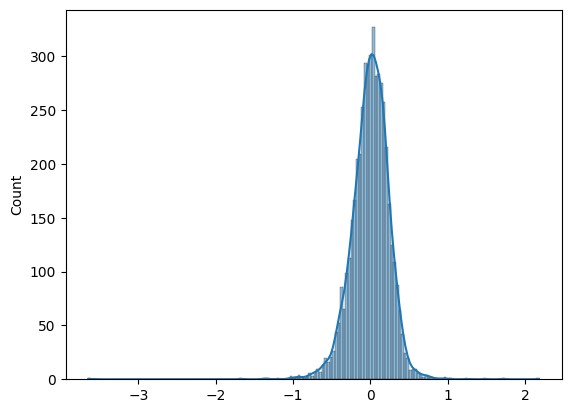

In [ ]:
residual = ols_model_2.resid
sns.histplot(residual, kde=True);

- Residuals have a normal distribution

**3. Linearity of variables**

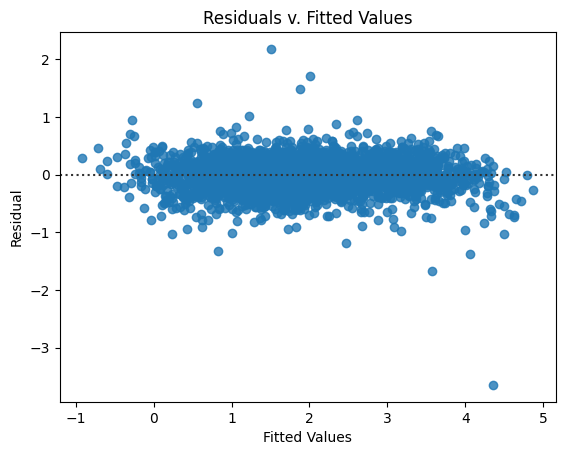

In [ ]:
# fitted values
fitted = ols_model_2.fittedvalues

# plotting residuals against fitted Values
sns.residplot(x = fitted, y = residual)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residuals v. Fitted Values")
plt.show()

- The plot shows the data is uniformly and randomly scattered along the x-axis, meeting the assumption.

**4. No Heteroscedasticity**

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(train_target_log, train_features)
lzip(name, test)

[('F statistic', 0.3841335914871804), ('p-value', 0.9999999999999999)]

- The residuals appear to have constant variance across the regression line as the p-value is greater than 0.05, failing to reject the original hypothesis of homoscedasticity and thus there is **no heteroscedasticity**, the assumption is met.

In [ ]:
# the coefficients of the OLS model that are significant in the prediciton of used car prices
coef = ols_model_2.params

# Take absolute values of coefficients
abs_coef = abs(coef)

# Create a DataFrame to store coefficients and their absolute values
coef_abs_df = pd.DataFrame({'Coefficient': coef, 'Absolute_Value': abs_coef})

# Sort the DataFrame based on absolute values (from highest to lowest)
sorted_coef_abs = coef_abs_df.sort_values(by='Absolute_Value', ascending=False)

print(sorted_coef_abs)

                           Coefficient  Absolute_Value
Power                         3.309798        3.309798
Year                          2.627663        2.627663
Fuel_Type_Electric            1.156812        1.156812
Make_Smart                   -0.866429        0.866429
Make_Mini                     0.809996        0.809996
Make_Tata                    -0.795347        0.795347
Make_Datsun                  -0.761232        0.761232
Make_Land                     0.634076        0.634076
Make_Chevrolet               -0.610574        0.610574
Make_Fiat                    -0.574980        0.574980
Make_Lamborghini              0.523644        0.523644
Seats                         0.514357        0.514357
Mileage                      -0.509899        0.509899
Make_Mahindra                -0.403529        0.403529
Make_Mercedes-Benz            0.372838        0.372838
Make_Isuzu                   -0.365070        0.365070
Make_Renault                 -0.355747        0.355747
Make_Jagua

### **Advanced Linear and Non-Linear Regression models**

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

#### **Regression Models**

In [ ]:
# Linear Regression model
lr_model_1 = LinearRegression().fit(X_train, y_train)

In [ ]:
compare_model_training_test_performance('LR model 1', lr_model_1)

Training metrics LR model 1: {'r-squared': 0.9206557032213718, 'adjusted r-squared': 0.9197890988457178, 'RSME': 0.24530690573586728, 'MAE': 0.18143908632839478, 'MAPE': inf}
Testing metrics LR model 1:  {'r-squared': 0.9268465571557393, 'adjusted r-squared': 0.9235416231610376, 'RSME': 0.23906111280706707, 'MAE': 0.1819941887854303, 'MAPE': inf}


- The model works slightly better on the test data indicating the model is **not overfitting** on the training data

- However, we will check if the model performance improves by trying L1 and L2 regularization

In [ ]:
# checking if Ridge(L2) Regularization will improve the model
ridge_model_1 = Ridge().fit(X_train, y_train)

compare_model_training_test_performance('Ridge model 1', ridge_model_1)

Training metrics Ridge model 1: {'r-squared': 0.9203190276974905, 'adjusted r-squared': 0.9194487461264487, 'RSME': 0.2458268007316825, 'MAE': 0.18251333714254503, 'MAPE': inf}
Testing metrics Ridge model 1:  {'r-squared': 0.9263209998608983, 'adjusted r-squared': 0.9229923221830241, 'RSME': 0.23991832098481944, 'MAE': 0.18326940619674345, 'MAPE': inf}


- The performance is very slightly below that of lr_model_1 but not by a significant amount.

In [ ]:
# trying L2 regularization again with optimized alpha
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
ridge_model_2 = Ridge()
ridge_model_2_cv = GridSearchCV(estimator=ridge_model_2, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
ridge_model_2_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [ ]:
ridge_model_2_cv.best_params_ #getting optimised parameters for alpha

{'alpha': 0.5}

In [ ]:
ridge_model_2_tuned = Ridge(alpha=0.5) ##creating Tuned Ridge Regression model using optimized alpha value
ridge_model_2_tuned.fit(X_train, y_train) # Fitting the data into the tuned model

Ridge(alpha=0.5)

In [ ]:
compare_model_training_test_performance('Ridge model 2 tuned', ridge_model_2_tuned)

Training metrics Ridge model 2 tuned: {'r-squared': 0.9205366247125272, 'adjusted r-squared': 0.9196687197524456, 'RSME': 0.24549091284281307, 'MAE': 0.1819869822501248, 'MAPE': inf}
Testing metrics Ridge model 2 tuned:  {'r-squared': 0.9266993164844988, 'adjusted r-squared': 0.9233877304351451, 'RSME': 0.23930157875825417, 'MAE': 0.18239397187740172, 'MAPE': inf}


- After applying GridSearchCV, we see that the optimized alpha value is 0.5

- The model improved slightly compared to the first ridge model but still not as good as lr_model_1

- Next, will attempt L1 regularization to see if that improves the model more

In [ ]:
lasso_model_1 = Lasso().fit(X_train, y_train)

compare_model_training_test_performance('Lasso model 1', lasso_model_1)

Training metrics Lasso model 1: {'r-squared': 0.0, 'adjusted r-squared': -0.010922075194286895, 'RSME': 0.8708671657673237, 'MAE': 0.6738074118964841, 'MAPE': inf}
Testing metrics Lasso model 1:  {'r-squared': -0.0006754894808189693, 'adjusted r-squared': -0.045884112810968825, 'RSME': 0.8841749016643308, 'MAE': 0.6908884730934847, 'MAPE': inf}


- As we can see, the r-squared value dropped to zero meaning adding Lasso Regularization made the model useless.

- Will perform cross validation on linear regression model 1 to validate if it is not overfitting.

In [ ]:
# cross-validation on Linear Regression model 1
r2 = cross_val_score(lr_model_1, train_features, train_target_log, scoring='r2', cv=9)
rmse = cross_val_score(lr_model_1, train_features, train_target_log, cv = 9,
                             scoring = 'neg_root_mean_squared_error')
mae = cross_val_score(lr_model_1, train_features, train_target_log, cv = 9,
                             scoring = 'neg_mean_absolute_error')


n = train_features.shape[0]
k = train_features.shape[1]

print("R-squared:", np.mean(r2))
print('Adjusted r-squared: ', 1 - ((1 - r2.mean()) * (n - 1) / (n - k - 1)))
print('Root Mean Squared Error', abs(rmse.mean()))
print('Mean Absolute Error', abs(mae.mean()))

R-squared: 0.9207486219102431
Adjusted r-squared:  0.9200577465270633
Root Mean Squared Error 0.24414944887202683
Mean Absolute Error 0.1809994542102395


- The Linear Regression model 1 is performing the best from the linear models trained.

- Cross-validation scores are very close to those of lr_model_1(92%) indicating a **good fit and performance.**

- Next, dimension reduction will be performed to find the best features for prediction.

In [ ]:
# import Sequential Feature Selector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
# create instance of linear regression model
reg = LinearRegression()

# Forward Feature Selection
sfs = SFS(
    reg,
    k_features=X_train.shape[1],
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# run SFS
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    3.4s finished

[2023-12-11 00:51:27] Features: 1/52 -- score: 0.5711358749772368[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.2s finished

[2023-12-11 00:51:29] Features: 2/52 -- score: 0.8063563978478439[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished

[2023-12-11 00:51:30] Features: 3/52 -- score: 0.8334346560868381[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    0.6s finished

[2023-12-11 00:51:30] Features: 4/52 -- score: 0.849930216160263[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.6s finished

[

- At 39 features, r-squared is the highest

In [ ]:
reg = LinearRegression()

# Forward feature selection with 39 features
sfs = SFS(
    reg,
    k_features=39,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.5s finished

[2023-12-11 00:52:09] Features: 1/39 -- score: 0.5711358749772368[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.7s finished

[2023-12-11 00:52:09] Features: 2/39 -- score: 0.8063563978478439[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished

[2023-12-11 00:52:11] Features: 3/39 -- score: 0.8334346560868381[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.0s finished

[2023-12-11 00:52:12] Features: 4/39 -- score: 0.849930216160263[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.2s finished

[

- Those 39 features are indeed generating the highest r-squared score

In [ ]:
# select the features which are important for the model
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 18, 19, 21, 22, 23, 24, 26, 27, 28, 30, 31, 34, 35, 37, 38, 40, 41, 42, 45, 46, 47, 48, 49, 51]


In [ ]:
# list of names of the important features
X_train.columns[feat_cols]

Index(['const', 'Year', 'Mileage', 'Power', 'Seats', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kolkata',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Second',
       'Owner_Type_Third', 'Make_Audi', 'Make_BMW', 'Make_Chevrolet',
       'Make_Datsun', 'Make_Fiat', 'Make_Ford', 'Make_Honda', 'Make_Jaguar',
       'Make_Jeep', 'Make_Land', 'Make_Mahindra', 'Make_Mercedes-Benz',
       'Make_Mini', 'Make_Mitsubishi', 'Make_Renault', 'Make_Skoda',
       'Make_Smart', 'Make_Tata', 'Make_Toyota', 'Make_Volvo'],
      dtype='object')

In [ ]:
# create the new X_train data
X_train_final = X_train[X_train.columns[feat_cols]]

In [ ]:
# create the new X_test data
X_test_final = X_test[X_train_final.columns]

In [ ]:
# fitting Linear Regression model on the new training data
lr_model_2 = LinearRegression().fit(X_train_final, y_train)

In [ ]:
check_model_performance(lr_model_2, X_train_final, y_train)

{'r-squared': 0.9195095972062078,
 'adjusted r-squared': 0.9188520509747546,
 'RSME': 0.2470722481980071,
 'MAE': 0.18174099684173542,
 'MAPE': inf}

In [ ]:
def compare_final_model_training_test_performance(model_name, model):
  print(f'Training metrics {model_name}:', check_model_performance(model, X_train_final, y_train))
  print(f'Testing metrics {model_name}: ', check_model_performance(model, X_test_final, y_test))

compare_final_model_training_test_performance('Linear Regression Model 2', lr_model_2)

Training metrics Linear Regression Model 2: {'r-squared': 0.9195095972062078, 'adjusted r-squared': 0.9188520509747546, 'RSME': 0.2470722481980071, 'MAE': 0.18174099684173542, 'MAPE': inf}
Testing metrics Linear Regression Model 2:  {'r-squared': 0.9236199436964269, 'adjusted r-squared': 0.9210608180986267, 'RSME': 0.24427641559264335, 'MAE': 0.18245839786006207, 'MAPE': inf}


- With the least amount of significant features, highest r-squared value of 0.92, and no overfitting with low RSME and MAE, Linear Regression Model 2 is the best linear regression model

- Will still check if non-linear models perform better

#### **Decision Trees**

In [ ]:
# declare dependent variable
train_target_copy = df_copy['Price']

# set the independent variables
train_features_copy = df_copy.drop(['Name', 'Price', 'Price_log', 'Kilometers_Driven', 'Kilometers_Driven_log', 'Engine_log', 'Power_log'], axis=1)

# Creating dummy variables for the categorical variables
train_features_copy = pd.get_dummies(train_features_copy, drop_first = True)

In [ ]:
# creating a decision tree
d_tree_1 = DecisionTreeRegressor(random_state=1).fit(train_features_copy, train_target_copy)

In [ ]:
# split the data into 80/20 training/test sets
X_train, X_test, y_train, y_test = train_test_split(train_features_copy, train_target_copy, test_size = 0.20, random_state = 1)

In [ ]:
check_model_performance(d_tree_1, X_train, y_train)

{'r-squared': 0.9987850733447453,
 'adjusted r-squared': 0.9987718038244611,
 'RSME': 0.38642071179473136,
 'MAE': 0.1111509832433181,
 'MAPE': 1.4375447980540113}

In [ ]:
compare_model_training_test_performance('Decision Tree 1', d_tree_1)

Training metrics Decision Tree 1: {'r-squared': 0.9987850733447453, 'adjusted r-squared': 0.9987718038244611, 'RSME': 0.38642071179473136, 'MAE': 0.1111509832433181, 'MAPE': 1.4375447980540113}
Testing metrics Decision Tree 1:  {'r-squared': 0.9989816053354185, 'adjusted r-squared': 0.9989355961933175, 'RSME': 0.36607864926838624, 'MAE': 0.10927893133997785, 'MAPE': 1.544518314799186}


- The decision tree regressor is working exceptionally well with almost 100% of the variance captured

- Appears to not be overfitting

In [ ]:
# perform cross-validation on decision tree 1
r2 = cross_val_score(d_tree_1, X_train, y_train, scoring='r2', cv=9)
rmse = cross_val_score(d_tree_1, X_train, y_train, cv = 9,
                             scoring = 'neg_root_mean_squared_error')
mae = cross_val_score(d_tree_1, X_train, y_train, cv = 9,
                             scoring = 'neg_mean_absolute_error')


n = X_train.shape[0]
k = X_train.shape[1]

print("R-squared:", np.mean(r2))
print('Adjusted r-squared: ', 1 - ((1 - r2.mean()) * (n - 1) / (n - k - 1)))
print('Root Mean Squared Error', abs(rmse.mean()))
print('Mean Absolute Error', abs(mae.mean()))

R-squared: 0.8195761925425044
Adjusted r-squared:  0.8176055901506141
Root Mean Squared Error 4.67502200135318
Mean Absolute Error 1.9201361349325805


- After performing cross validation, it appears decision tree 1 in fact is **overfitting the training data**

**Feature Importance**

In [ ]:
print(pd.DataFrame(d_tree_1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Power                      6.355399e-01
Year                       1.798734e-01
Engine                     4.994570e-02
Mileage                    2.496262e-02
Location_Hyderabad         1.699777e-02
Make_Land                  1.241890e-02
Seats                      1.214775e-02
Transmission_Manual        9.934110e-03
Make_Porsche               6.399854e-03
Make_Toyota                5.854064e-03
Fuel_Type_Petrol           5.175365e-03
Make_Jeep                  4.458202e-03
Make_Mini                  3.745086e-03
Location_Bangalore         3.243825e-03
Make_Mercedes-Benz         3.021177e-03
Location_Delhi             2.753781e-03
Make_Jaguar                2.453961e-03
Location_Coimbatore        2.412256e-03
Location_Mumbai            2.250034e-03
Location_Kochi             2.016680e-03
Make_Audi                  1.890763e-03
Owner_Type_Second          1.633264e-03
Make_Skoda                 1.428515e-03
Make_BMW                   1.427933e-03


- The most important feature is Power, followed by Year, Engine, and Mileage

- The features that have no importance at all are Makes: Isuzu, Lamborghini, Bentley, and Smart

### **Hyperparameter Tuning: Decision Tree**

In [ ]:
# estimator type
d_tree_tuned = DecisionTreeRegressor(random_state = 1)

# parameter options
parameters = {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto']
}

# Type of scoring used to compare parameter combinations
scorer = 'r2'

# run grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# set the model to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=7, max_features='auto',
                      random_state=1)

In [ ]:
compare_model_training_test_performance('Decision Tree Tuned', d_tree_tuned)

Training metrics Decision Tree Tuned: {'r-squared': 0.9123583386512861, 'adjusted r-squared': 0.9114011098358832, 'RSME': 3.28201579391608, 'MAE': 1.7804230726043684, 'MAPE': 23.024730878760398}
Testing metrics Decision Tree Tuned:  {'r-squared': 0.8032557234338331, 'adjusted r-squared': 0.7943671896532591, 'RSME': 5.088237757066835, 'MAE': 2.172647625938025, 'MAPE': 24.280198896995962}


- This combination of parameters gave a weak performance compared to the untuned model decision tree model.

- There is **overfitting** as well.

- Will try other combinations to see if it improves past the first decision tree model

In [ ]:
# estimator type
d_tree_tuned_2 = DecisionTreeRegressor(random_state = 1)

# parameter options
parameters = {
    'criterion': ['absolute_error', 'friedman_mse', 'mae', 'squared_error'],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4, 5, 6]
}

# Type of scoring used to compare parameter combinations
scorer = 'r2'

# run grid search
grid_obj = GridSearchCV(d_tree_tuned_2, parameters, scoring = scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# set the model to the best combination of parameters
d_tree_tuned_2 = grid_obj.best_estimator_

# fit the best algorithm to the data
d_tree_tuned_2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                      max_features='auto', min_samples_leaf=4, random_state=1)

In [ ]:
compare_model_training_test_performance('Decision Tree Tuned 2', d_tree_tuned_2)

Training metrics Decision Tree Tuned 2: {'r-squared': 0.9086114794737167, 'adjusted r-squared': 0.9076133271806339, 'RSME': 0.26326779742748113, 'MAE': 0.1956765795973311, 'MAPE': inf}
Testing metrics Decision Tree Tuned 2:  {'r-squared': 0.897178185055498, 'adjusted r-squared': 0.8925328902013588, 'RSME': 0.28342240853907386, 'MAE': 0.21319063965309976, 'MAPE': inf}


- Still overfitting

In [ ]:
# estimator type
d_tree_tuned_3 = DecisionTreeRegressor(random_state = 1)

# parameter options
parameters = {
    'criterion': ['friedman_mse'],
    'max_depth': [7],
    'min_samples_split': [10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [4],
}

# Type of scoring used to compare parameter combinations
scorer = 'r2'

# run grid search
grid_obj = GridSearchCV(d_tree_tuned_3, parameters, scoring = scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# set the model to the best combination of parameters
d_tree_tuned_3 = grid_obj.best_estimator_

# fit the best algorithm to the data
d_tree_tuned_3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                      max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, random_state=1)

In [ ]:
compare_model_training_test_performance('Decision Tree Tuned 3', d_tree_tuned_3)

Training metrics Decision Tree Tuned 3: {'r-squared': 0.8014180956997009, 'adjusted r-squared': 0.7992491692087084, 'RSME': 0.38808043839003886, 'MAE': 0.2917499153321328, 'MAPE': inf}
Testing metrics Decision Tree Tuned 3:  {'r-squared': 0.809995094309568, 'adjusted r-squared': 0.8014110325407561, 'RSME': 0.3852777763098835, 'MAE': 0.2897822018085274, 'MAPE': inf}


- With the third tuned decision tree, it appears there is no overfitting.

In [ ]:
# Perform cross-validation on Decision Tree Tuned 3
r2 = cross_val_score(d_tree_tuned_3, train_features_scaled, train_target, scoring='r2', cv=9)
rmse = cross_val_score(d_tree_tuned_3, train_features_scaled, train_target, cv = 9,
                             scoring = 'neg_root_mean_squared_error')
mae = cross_val_score(d_tree_tuned_3, train_features_scaled, train_target, cv = 9,
                             scoring = 'neg_mean_absolute_error')


n = train_features_scaled.shape[0]
k = train_features_scaled.shape[1]

print("R-squared:", np.mean(r2))
print('Adjusted r-squared: ', 1 - ((1 - r2.mean()) * (n - 1) / (n - k - 1)))
print('Root Mean Squared Error', abs(rmse.mean()))
print('Mean Absolute Error', abs(mae.mean()))

R-squared: 0.7664083120992944
Adjusted r-squared:  0.7643719721544768
Root Mean Squared Error 0.4204229304627845
Mean Absolute Error 0.31548701037346927


- The decision tree model(3) is **still overfitting** the training data

**Random Forest**

In [ ]:
rf_model = RandomForestRegressor(random_state=1).fit(X_train, y_train)

compare_model_training_test_performance('Random Forest', rf_model)

Training metrics Random Forest: {'r-squared': 0.9823817079599152, 'adjusted r-squared': 0.9821892796494585, 'RSME': 1.4715237238776684, 'MAE': 0.5931182168847285, 'MAPE': 6.737700037864683}
Testing metrics Random Forest:  {'r-squared': 0.8707733354758198, 'adjusted r-squared': 0.8649351195285936, 'RSME': 4.123750774364981, 'MAE': 1.4360761945833793, 'MAPE': 14.727088950360582}


- The model has high scores but overfitting the training data

In [ ]:
# checking feature importance
print(pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Power                      6.710798e-01
Year                       1.769160e-01
Engine                     3.834406e-02
Mileage                    2.517821e-02
Make_Land                  1.095483e-02
Seats                      1.035238e-02
Transmission_Manual        6.812756e-03
Make_Mercedes-Benz         6.456472e-03
Make_Porsche               4.803459e-03
Make_Mini                  3.972643e-03
Location_Hyderabad         3.732894e-03
Make_Audi                  3.299320e-03
Location_Bangalore         3.220013e-03
Location_Mumbai            2.887134e-03
Location_Coimbatore        2.774460e-03
Location_Kochi             2.421954e-03
Owner_Type_Second          2.246005e-03
Location_Delhi             2.190969e-03
Make_Jaguar                1.859340e-03
Make_BMW                   1.673018e-03
Location_Chennai           1.661051e-03
Make_Lamborghini           1.616924e-03
Fuel_Type_Petrol           1.538979e-03
Location_Kolkata           1.452235e-03


- - The most important features initially are: Power, Year, Engine, Mileage, respectively.

### **Hyperparameter Tuning: Random Forest**

In [ ]:
# estimator type
rf_tuned_1 = RandomForestRegressor(random_state = 1)

# parameter options
parameters = {
    'n_estimators': [10],
    'criterion': ['poisson'],
    'max_depth': [5],
    'min_samples_split': [5],
    'max_features': ['auto']
}

# Type of scoring used to compare parameter combinations
scorer = 'r2'

# run grid search
grid_obj = GridSearchCV(rf_tuned_1, parameters, scoring = scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# set the model to the best combination of parameters
rf_tuned_1 = grid_obj.best_estimator_

# fit the best algorithm to the data
rf_tuned_1.fit(X_train, y_train)

RandomForestRegressor(criterion='poisson', max_depth=5, max_features='auto',
                      min_samples_split=5, n_estimators=10, random_state=1)

In [ ]:
compare_model_training_test_performance('Random Forest Tuned 1', rf_tuned_1)

Training metrics Random Forest Tuned 1: {'r-squared': 0.8764054974747195, 'adjusted r-squared': 0.875055589024538, 'RSME': 3.897489400772983, 'MAE': 2.0595707221036434, 'MAPE': 27.626216101574457}
Testing metrics Random Forest Tuned 1:  {'r-squared': 0.8080121774716154, 'adjusted r-squared': 0.7993385312757196, 'RSME': 5.0263552962411175, 'MAE': 2.205985531102491, 'MAPE': 26.946549338319052}


- First model tuned model appears to be overfitting.

- Linear Regression Model 2 will be the final model as it is performing the best without overfitting.

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?



- r-squared, adjusted r-squared, and cross validation scores were used to measure success, especially by comparing training scores to test scores as these metrics helped finding a model that performs well without overfitting.

- LR Model 2 is the best-performing linear regression model at 92% with no overfitting.

- Trying other model types that were not attempted here could possibly find models with better performance.

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

- Power, Year, Seats, and Mileage are the most important numerical features.

- Make and Location and Transmission are the most important categorical features particularly Kolkata, Mahindra, and Tata, and manual transmission.

- The top five vehicle types are mostly 4-door small-to-medium-sized compact cars with the most abundant(Mahindra XUV500 W8 2WD) being a crossover-type SUV.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

- I think the Linear Regression model 2 is the best solution at the present to adopt because it has the highest r-squared value(92%), and lowest RSME and MAE values with no overfitting.

- This model will help the buiness with predicting the best used prices to sell their cars more.

- Perhaps more experimentation would tell if this model is good enough to be deployed in production.

**Executive Summary**

**Geographical Market Insights**: Understanding that cities with varying populations, like Coimbatore and Kochi, exhibit significant vehicle listings.

**Brand Popularity**: Maruti, Hyundai, Honda, and Toyota dominate the used car market, indicating strong brand recognition and potential customer preference.

**Ownership History Impact on Price**: Vehicles with fewer owners command higher average prices, which is not surprising.

**Power and Performance Distribution**: Vehicles with power outputs around 50-80 BHP, 100 BHP, and 175 BHP are common.

**Most Abundant Vehicle Types**: Small-to-medium-sized compact cars, especially four-door models, are among the most abundant.

**City-wise Sales Concentration**: Mumbai and Hyderabad have the highest number of vehicles for sale, implying potentially higher competition and market saturation in these regions.

**Fuel Type Preferences**: Diesel and petrol cars dominate the used car market and diesel and petrol cars tend to have higher average prices.

**Electric Vehicle Presence**: Electric vehicles are extremely rare in the used car market, signaling a potential niche market for sellers exploring eco-friendly options.

**Price Variation within Cities**: Cities like Coimbatore and Bangalore exhibit higher average vehicle prices, indicating potential market segments willing to pay more for used cars.



**Problem and Solution Summary**

The problem of predicting used car prices in order to offer competitive prices to attract customers, gain a foothold in the market, and grow the business.
A Linear Regression model will be used in order to predict used car prices based off the year, power, mileage, and and number of seats. Also, to a lesser extent, the make, location, and transmission type.



**Recommendations for Implementation**

**Inventory Management and Pricing Strategy**:

Stakeholders should focus on stocking more diesel and petrol cars, considering their higher average prices and potential profitability.
They can analyze the geographical market insights to adjust inventory, ensuring adequate representation of vehicles in smaller cities like Coimbatore and Kochi.

**Brand and Vehicle Type Focus**:

Capitalizing on the dominance of Maruti, Hyundai, Honda, and Toyota, stakeholders can prioritize stocking and marketing vehicles from these brands.
Given the popularity of small-to-medium-sized compact cars, stakeholders can prioritize these models in their inventory to cater to majority customer preferences.

**Single-Owner Vehicles and Power Variants**:

Emphasize obtaining vehicles with single owners as they command higher prices, appealing to customer preferences for better resale value.
Considering the significant demand across power ranges (50-80 BHP, 100 BHP, 175 BHP), stock vehicles in these ranges to cater to diverse customer needs.

**Geographic Pricing and Electric Vehicles**:

Adjust pricing strategies in cities like Coimbatore and Bangalore, where average vehicle prices are higher, ensuring competitive yet profitable pricing.
Consider exploring the rare market of electric vehicles as a potential niche segment to attract environmentally conscious customers.

**Expected Benefits and Costs**:

**Benefits**:

Increased market competitiveness and customer attraction due to targeted inventory management and competitive pricing.
Potential revenue increase by focusing on high-demand segments and untapped markets.
Improved customer satisfaction by offering preferred vehicle types and brands.

**Assumptions on Costs**:

Initial costs may include quality data collection, with no missing values, model development, and implementation.
Marketing and inventory adjustments might incur additional operational costs.
Potential investments in obtaining targeted vehicle types and brands.

**Potential Risks or Challenges**:

**Inventory Imbalance**:

Overstocking certain vehicle types or brands might lead to inventory imbalances and increased carrying costs.

**Market Shifts**:

Rapid market changes or unexpected shifts in consumer preferences could impact the effectiveness of the chosen strategy.

**Model Accuracy**:

If the linear regression model fails to capture complex pricing dynamics, it might lead to inaccurate price predictions.

**Further Analysis and Associated Problems**:

**Evaluation of Model Performance**:

Continuous monitoring and evaluation of the Linear Regression model's accuracy and adaptability to changing market trends.

**Competitive Analysis**:

Regular analysis of competitors' pricing strategies and inventory management to stay competitive.

**Customer Feedback and Preferences**:

Collecting feedback to understand evolving customer preferences and incorporate them into inventory decisions.